<a href="https://colab.research.google.com/github/eidergiraldo85/App-pedidos-backend/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Cargamos los datos 
url_Mortalidad = "https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/WHOMortalityDatabase_Trends_years_many_countries_by_age_sex-All%20Causes_8th%20agosto%202022%2020_22.csv"
Mortalidad = pd.read_csv(url_Mortalidad,skiprows=[0,1,2,3,4,5] , header=0 ,index_col=False)
Mortalidad = Mortalidad[Mortalidad['Year']>=2000]
Mortalidad.columns = ['Region_Code', 'Region_Name', 'Country_Code', 'Country_Name', 'Year',
       'Sex', 'Age_group_code', 'Age_Group', 'Number_of_deaths',
       'Percentage_of_cause-specific_deaths_out_of_total_deaths',
       'Age-standardized_death_rate_per_100000_standard_population',
       'Death_rate_per_100000population']
Mortalidad.drop( columns=['Region_Code','Country_Code','Age_group_code','Percentage_of_cause-specific_deaths_out_of_total_deaths'], inplace=True)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Cargamos las urls de los datos
url_Children_out_of_school = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Children%20out%20of%20school%20(%25%20of%20primary%20school%20age).csv'
url_Gov_expenditure_education = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Government%20expenditure%20on%20education%2C%20total%20(%25%20of%20GDP).csv'
url_Literacy_youth_rate = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Literacy%20rate%2C%20youth%20total%20(%25%20of%20people%20ages%2015-24).csv'
url_Literacy_adult_rate = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Literacy%20rate%2C%20adult%20total%20(%25%20of%20people%20ages%2015%20and%20above).csv'
url_Primary_comp_rate = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Primary%20completion%20rate%2C%20total%20(%25%20of%20relevant%20age%20group).csv'
url_pupil_teacher_ratio = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Pupil-teacher%20ratio%2C%20primary.csv'
#URL metadata
url_metadata = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Metadata_Country.csv'

In [ ]:
# Cargamos los datos de las variables de educacion
Children_out_of_school = pd.read_csv(url_Children_out_of_school, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Gov_expenditure_education = pd.read_csv(url_Gov_expenditure_education, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Literacy_youth_rate = pd.read_csv(url_Literacy_youth_rate, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Literacy_adult_rate = pd.read_csv(url_Literacy_adult_rate, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
Primary_comp_rate = pd.read_csv(url_Primary_comp_rate, skiprows=[0,1,2,3] , header=0 ,index_col=False) 
pupil_teacher_ratio = pd.read_csv(url_pupil_teacher_ratio, skiprows=[0,1,2,3] , header=0 ,index_col=False) 

In [ ]:
# Cargamos la Metadata
metadata = pd.read_csv(url_metadata, header=0 ,index_col=False) 
metadata = metadata.drop(['Country Code','SpecialNotes','Unnamed: 5'],axis = 1)
metadata.columns = ['region', 'income', 'country']
metadata

region               income  \
0     Latin America & Caribbean          High income   
1                           NaN                  NaN   
2                    South Asia           Low income   
3                           NaN                  NaN   
4            Sub-Saharan Africa  Lower middle income   
..                          ...                  ...   
260       Europe & Central Asia  Upper middle income   
261  Middle East & North Africa           Low income   
262          Sub-Saharan Africa  Upper middle income   
263          Sub-Saharan Africa           Low income   
264          Sub-Saharan Africa  Lower middle income   

                         country  
0                          Aruba  
1    Africa Eastern and Southern  
2                    Afghanistan  
3     Africa Western and Central  
4                         Angola  
..                           ...  
260                       Kosovo  
261                  Yemen, Rep.  
262                 South Africa  
263                       Zambia  
264                     Zimbabwe  

[265 rows x 3 columns]

In [ ]:
metadata.region.unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [ ]:
# Creamos una lista con las variables de educacion 
tables = [Children_out_of_school, Gov_expenditure_education, Literacy_youth_rate,
                   Literacy_adult_rate,Primary_comp_rate,pupil_teacher_ratio]
# Concatenamos las tablas
education = pd.concat(tables , axis = 0)

In [ ]:
# Luego de obtener la tabla concatenada de educacion, se eligen las columnas con las que se van a trabajar 
education = education[['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
education.head()

Country Name  \
0                        Aruba   
1  Africa Eastern and Southern   
2                  Afghanistan   
3   Africa Western and Central   
4                       Angola   

                                     Indicator Name     2000     2001  \
0  Children out of school (% of primary school age)  1.60268  0.32258   
1  Children out of school (% of primary school age)      NaN      NaN   
2  Children out of school (% of primary school age)      NaN      NaN   
3  Children out of school (% of primary school age)      NaN      NaN   
4  Children out of school (% of primary school age)      NaN      NaN   

      2002     2003     2004     2005     2006     2007  ...  2012  2013  \
0  1.81634  3.32156  2.17652  1.64077  0.96918  0.81243  ...   NaN   NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   

      2014  2015  2016  2017  2018  2019  2020  2021  
0  0.07791   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 24 columns]

In [ ]:
education.shape

(1596, 24)

In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 265
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1596 non-null   object 
 1   Indicator Name  1596 non-null   object 
 2   2000            855 non-null    float64
 3   2001            814 non-null    float64
 4   2002            804 non-null    float64
 5   2003            753 non-null    float64
 6   2004            813 non-null    float64
 7   2005            814 non-null    float64
 8   2006            803 non-null    float64
 9   2007            840 non-null    float64
 10  2008            859 non-null    float64
 11  2009            859 non-null    float64
 12  2010            904 non-null    float64
 13  2011            928 non-null    float64
 14  2012            902 non-null    float64
 15  2013            886 non-null    float64
 16  2014            932 non-null    float64
 17  2015            918 non-null    fl

In [ ]:
# Llamamos la funcion .melt, la cual nos permite cambiar la estructura de nuestro dataframe de un formato ancho a uno largo. 
# Primero seleccionamos las columnas a las que no queremos hacerle melt usando el parámetro id_vars ('Country Name','Indicator Name') 
# y también a la única columna que quiero aplicar el melt, en este caso 'Year'con la propiedad value_vars en este caso var_name. 
# Luego utilizo un set_index para fijar las columnas como índices. 
# Despues llamamos las funciones:  
# .squeeze() para eliminar las entradas unidimensionales de la forma de una matriz;  
# .unstack() para convertir las columnas de datos en filas; 
# .reset_index() para reestablecer el indice antiguo por el indice que predeterminamos. 
# Finalmente, visualizamos la nueva estructura del dataframe.
    
df = ((education.melt(id_vars=['Country Name','Indicator Name'],var_name='Year'))
   .set_index(['Country Name','Year','Indicator Name'])
   .squeeze()
   .unstack()
   .reset_index())
df 

Indicator Name Country Name  Year  \
0               Afghanistan  2000   
1               Afghanistan  2001   
2               Afghanistan  2002   
3               Afghanistan  2003   
4               Afghanistan  2004   
...                     ...   ...   
5847               Zimbabwe  2017   
5848               Zimbabwe  2018   
5849               Zimbabwe  2019   
5850               Zimbabwe  2020   
5851               Zimbabwe  2021   

Indicator Name  Children out of school (% of primary school age)  \
0                                                            NaN   
1                                                            NaN   
2                                                            NaN   
3                                                            NaN   
4                                                            NaN   
...                                                          ...   
5847                                                    15.51343   
5848                                                    15.30251   
5849                                                    15.13754   
5850                                                    13.63717   
5851                                                         NaN   

Indicator Name  Government expenditure on education, total (% of GDP)  \
0                                                             NaN       
1                                                             NaN       
2                                                             NaN       
3                                                             NaN       
4                                                             NaN       
...                                                           ...       
5847                                                      5.81878       
5848                                                      3.86611       
5849                                                          NaN       
5850                                                          NaN       
5851                                                          NaN       

Indicator Name  Literacy rate, adult total (% of people ages 15 and above)  \
0                                                             NaN            
1                                                             NaN            
2                                                             NaN            
3                                                             NaN            
4                                                             NaN            
...                                                           ...            
5847                                                          NaN            
5848                                                          NaN            
5849                                                          NaN            
5850                                                          NaN            
5851                                                          NaN            

Indicator Name  Literacy rate, youth total (% of people ages 15-24)  \
0                                                             NaN     
1                                                             NaN     
2                                                             NaN     
3                                                             NaN     
4                                                             NaN     
...                                                           ...     
5847                                                          NaN     
5848                                                          NaN     
5849                                                          NaN     
5850                                                          NaN     
5851                                                          NaN     

Indicator Name  Primary completion rate, total (% of relevant age group

In [ ]:
# Nos aseguramos de quetodos los Nas tengan el mismo formato
df = df.fillna(np.nan)

In [ ]:
# Le indicamos a python que la variable year es de tipo Datetime
df['Year'] = pd.to_datetime(df['Year'])

In [ ]:
# Creamos un nuevo DataFrame y le asignamos la variable años como index y eliminamos la variable year
df0 = df
df0.index = df0['Year']
del df0['Year']
df0

Indicator Name Country Name  Children out of school (% of primary school age)  \
Year                                                                            
2000-01-01      Afghanistan                                               NaN   
2001-01-01      Afghanistan                                               NaN   
2002-01-01      Afghanistan                                               NaN   
2003-01-01      Afghanistan                                               NaN   
2004-01-01      Afghanistan                                               NaN   
...                     ...                                               ...   
2017-01-01         Zimbabwe                                          15.51343   
2018-01-01         Zimbabwe                                          15.30251   
2019-01-01         Zimbabwe                                          15.13754   
2020-01-01         Zimbabwe                                          13.63717   
2021-01-01         Zimbabwe                                               NaN   

Indicator Name  Government expenditure on education, total (% of GDP)  \
Year                                                                    
2000-01-01                                                    NaN       
2001-01-01                                                    NaN       
2002-01-01                                                    NaN       
2003-01-01                                                    NaN       
2004-01-01                                                    NaN       
...                                                           ...       
2017-01-01                                                5.81878       
2018-01-01                                                3.86611       
2019-01-01                                                    NaN       
2020-01-01                                                    NaN       
2021-01-01                                                    NaN       

Indicator Name  Literacy rate, adult total (% of people ages 15 and above)  \
Year                                                                         
2000-01-01                                                    NaN            
2001-01-01                                                    NaN            
2002-01-01                                                    NaN            
2003-01-01                                                    NaN            
2004-01-01                                                    NaN            
...                                                           ...            
2017-01-01                                                    NaN            
2018-01-01                                                    NaN            
2019-01-01                                                    NaN            
2020-01-01                                                    NaN            
2021-01-01                                                    NaN            

Indicator Name  Literacy rate, youth total (% of people ages 15-24)  \
Year                                                                  
2000-01-01                                                    NaN     
2001-01-01                                                    NaN     
2002-01-01                                                    NaN     
2003-01-01                                                    NaN     
2004-01-01                                                    NaN     
...                                                           ...     
2017-01-01                                                    NaN     
2018-01-01                                                    NaN     
2019-01-01                                                    NaN     
2020-01-01                                                    NaN     
2021-01-01                                                    NaN     

Indicator Name  Primary completion rate, total (% of rele

In [ ]:
# Llenamos los NAs con interpolación con ciclos anuales 
education = df0.groupby(['Country Name'])\
                .resample('A')\
                .mean()
education['Children out of school (% of primary school age)'] = education['Children out of school (% of primary school age)'].interpolate()
education['Government expenditure on education, total (% of GDP)'] = education['Government expenditure on education, total (% of GDP)'].interpolate()
education['Literacy rate, adult total (% of people ages 15 and above)'] = education['Literacy rate, adult total (% of people ages 15 and above)'].interpolate()
education['Literacy rate, youth total (% of people ages 15-24)'] = education['Literacy rate, youth total (% of people ages 15-24)'].interpolate()
education['Primary completion rate, total (% of relevant age group)'] = education['Primary completion rate, total (% of relevant age group)'].interpolate()
education['Pupil-teacher ratio, primary'] = education['Pupil-teacher ratio, primary'].interpolate()
#Reseteamos los index
education = education.reset_index()

In [ ]:
# Visualizamos las columnas del dataframe education 
education.columns

Index(['Country Name', 'Year',
       'Children out of school (% of primary school age)',
       'Government expenditure on education, total (% of GDP)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Literacy rate, youth total (% of people ages 15-24)',
       'Primary completion rate, total (% of relevant age group)',
       'Pupil-teacher ratio, primary'],
      dtype='object', name='Indicator Name')

In [ ]:
# Renombramos las columnas de education para estandarizar 
education.columns = ['country', 'year',
       'chil_out_school',
       'gov_expenditure_education',
       'literacy_adult_rate',
       'literacy_youth_rate',
       'primary_completion_rate',
       'pupil_teacher_ratio']

In [ ]:
# Visualizamos el nuevo dataframe con la data limpia y ordenada 
education.head(25)

country       year  chil_out_school  \
0                   Afghanistan 2000-12-31              NaN   
1                   Afghanistan 2001-12-31              NaN   
2                   Afghanistan 2002-12-31              NaN   
3                   Afghanistan 2003-12-31              NaN   
4                   Afghanistan 2004-12-31              NaN   
5                   Afghanistan 2005-12-31              NaN   
6                   Afghanistan 2006-12-31              NaN   
7                   Afghanistan 2007-12-31              NaN   
8                   Afghanistan 2008-12-31              NaN   
9                   Afghanistan 2009-12-31              NaN   
10                  Afghanistan 2010-12-31              NaN   
11                  Afghanistan 2011-12-31              NaN   
12                  Afghanistan 2012-12-31              NaN   
13                  Afghanistan 2013-12-31              NaN   
14                  Afghanistan 2014-12-31              NaN   
15                  Afghanistan 2015-12-31              NaN   
16                  Afghanistan 2016-12-31              NaN   
17                  Afghanistan 2017-12-31              NaN   
18                  Afghanistan 2018-12-31              NaN   
19                  Afghanistan 2019-12-31              NaN   
20                  Afghanistan 2020-12-31              NaN   
21                  Afghanistan 2021-12-31              NaN   
22  Africa Eastern and Southern 2000-12-31              NaN   
23  Africa Eastern and Southern 2001-12-31              NaN   
24  Africa Eastern and Southern 2002-12-31              NaN   

    gov_expenditure_education  literacy_adult_rate  literacy_youth_rate  \
0                         NaN                  NaN                  NaN   
1                         NaN                  NaN                  NaN   
2                         NaN                  NaN                  NaN   
3                         NaN                  NaN                  NaN   
4                         NaN                  NaN                  NaN   
5                    2.570000                  NaN                  NaN   
6                    2.900000                  NaN                  NaN   
7                    2.850000                  NaN                  NaN   
8                    3.510000                  NaN                  NaN   
9                    3.730000                  NaN                  NaN   
10                   3.479450                  NaN                  NaN   
11                   3.462010            31.448851            46.990051   
12                   3.320000            32.030570            47.883986   
13                   3.454460            32.612289            48.777921   
14                   3.695220            33.194008            49.671856   
15                   3.255800            33.775727            50.565791   
16                   3.511980            34.357446            51.459726   
17                   3.373310            34.939165            52.353661   
18                   3.199790            35.520884            53.247596   
19                   3.213780            36.102603            54.141531   
20                   3.398890            36.684322            55.035466   
21                   3.584000            37.266041            55.929401   
22                   3.769110            38.601844            56.875179   
23                   4.572580            39.937647            57.820956   
24                   4.296707            41.273450            58.766733   

    primary_completion_rate  pupil_teacher_ratio  
0                       NaN                  NaN  
1                       NaN                  NaN  
2                       NaN                  NaN  
3                       NaN                  NaN  
4                       NaN                  NaN  
5                       NaN                  NaN  
6                       NaN            42.326020  
7                       Na

In [ ]:
education.shape

(5852, 8)

In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   country                    5852 non-null   object        
 1   year                       5852 non-null   datetime64[ns]
 2   chil_out_school            5786 non-null   float64       
 3   gov_expenditure_education  5847 non-null   float64       
 4   literacy_adult_rate        5841 non-null   float64       
 5   literacy_youth_rate        5841 non-null   float64       
 6   primary_completion_rate    5836 non-null   float64       
 7   pupil_teacher_ratio        5846 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 365.9+ KB


In [ ]:
# Visualizamos las primeras cinco filas del datframe metadata
metadata.head()

region               income                      country
0  Latin America & Caribbean          High income                        Aruba
1                        NaN                  NaN  Africa Eastern and Southern
2                 South Asia           Low income                  Afghanistan
3                        NaN                  NaN   Africa Western and Central
4         Sub-Saharan Africa  Lower middle income                       Angola

In [ ]:
# Llamamos la función .merge para fusionar o unir la columna 'country' de los dataframes metadata y education
education_regions = pd.merge(metadata ,education, on='country')
education_regions

region               income   country       year  \
0     Latin America & Caribbean          High income     Aruba 2000-12-31   
1     Latin America & Caribbean          High income     Aruba 2001-12-31   
2     Latin America & Caribbean          High income     Aruba 2002-12-31   
3     Latin America & Caribbean          High income     Aruba 2003-12-31   
4     Latin America & Caribbean          High income     Aruba 2004-12-31   
...                         ...                  ...       ...        ...   
5627         Sub-Saharan Africa  Lower middle income  Zimbabwe 2017-12-31   
5628         Sub-Saharan Africa  Lower middle income  Zimbabwe 2018-12-31   
5629         Sub-Saharan Africa  Lower middle income  Zimbabwe 2019-12-31   
5630         Sub-Saharan Africa  Lower middle income  Zimbabwe 2020-12-31   
5631         Sub-Saharan Africa  Lower middle income  Zimbabwe 2021-12-31   

      chil_out_school  gov_expenditure_education  literacy_adult_rate  \
0             1.60268                   4.714680            97.291252   
1             0.32258                   4.739860            97.244391   
2             1.81634                   4.923650            97.197530   
3             3.32156                   4.666065            97.150668   
4             2.17652                   4.408480            97.103807   
...               ...                        ...                  ...   
5627         15.51343                   5.818780            88.693420   
5628         15.30251                   3.866110            88.693420   
5629         15.13754                   3.866110            88.693420   
5630         13.63717                   3.866110            88.693420   
5631         13.63717                   3.866110            88.693420   

      literacy_youth_rate  primary_completion_rate  pupil_teacher_ratio  
0               99.026413                97.142860             19.05967  
1               99.037613                94.404068             18.94779  
2               99.048813                94.755241             19.06977  
3               99.060013                90.215919             18.43017  
4               99.071213                90.559898             18.45109  
...                   ...                      ...                  ...  
5627            90.428123                95.476372             36.40820  
5628            90.428123                92.195152             36.40820  
5629            90.428123                88.508812             36.40820  
5630            90.428123                90.017349             36.40820  
5631            90.428123                90.017349             36.40820  

[5632 rows x 10 columns]

In [ ]:
education.shape

(5852, 8)

# Economic growth

In [ ]:
# Importamos la libreria 
import pandas as pd

# Cargamos las urls de los datos
url_Unemployment = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Unemployment%2C%20total%20(%25%20of%20total%20labor%20force)%20(modeled%20ILO%20estimate).csv'
url_GDP_per_capita = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/GDP%20per%20capita%20(current%20US%24).csv'
url_GDP_per_capita_growth = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/GDP%20per%20capita%20growth%20(annual%20%25).csv'
url_Exports = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Exports%20of%20goods%20and%20services%20(%25%20of%20GDP).csv'
url_Energy_use = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Energy%20use%20(kg%20of%20oil%20equivalent%20per%20capita).csv'
url_Fossil_fuel = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Fossil%20fuel%20energy%20consumption%20(%25%20of%20total).csv'
url_Renewable_energy = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Renewable%20energy%20consumption%20(%25%20of%20total%20final%20energy%20consumption).csv'
url_Revenue_excluding_grants = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Revenue%2C%20excluding%20grants%20(%25%20of%20GDP).csv'
url_Inflation = 'https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/Inflation%2C%20GDP%20deflator%20(annual%20%25).csv'

In [ ]:
# Cargamos los datos de las variables de crecimiento económico 
Unemployment = pd.read_csv(url_Unemployment, skiprows=[0,1,2,3] , header=0 ,index_col=False)
GDP_per_capita = pd.read_csv(url_GDP_per_capita, skiprows=[0,1,2,3] , header=0 ,index_col=False)
GDP_per_capita_growth = pd.read_csv(url_GDP_per_capita_growth, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Exports = pd.read_csv(url_Exports, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Energy_use = pd.read_csv(url_Energy_use, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Fossil_fuel = pd.read_csv(url_Fossil_fuel, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Renewable_energy = pd.read_csv(url_Renewable_energy, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Revenue_excluding_grants = pd.read_csv(url_Revenue_excluding_grants, skiprows=[0,1,2,3] , header=0 ,index_col=False)
Inflation = pd.read_csv(url_Inflation, skiprows=[0,1,2,3] , header=0 ,index_col=False)

In [ ]:
# Creamos una lista con las variables de crecimiento económico
tables1 = [ Unemployment, GDP_per_capita , GDP_per_capita_growth,
                   Exports, Energy_use, Fossil_fuel, Renewable_energy, Revenue_excluding_grants, Inflation]

# Concatenamos las tablas 
economy = pd.concat(tables1 , axis = 0)
economy

Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
1    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
2    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
3    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
4    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
..                                                 ...                ...   
261                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
262                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
263                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
264                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
265                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   

     1960      1961      1962      1963      1964       1965  ...       2013  \
0     NaN       NaN       NaN       NaN       NaN        NaN  ...        NaN   
1     NaN       NaN       NaN       NaN       NaN        NaN  ...   6.445456   
2     NaN       NaN       NaN       NaN       NaN        NaN  ...  11.193000   
3     NaN       NaN       NaN       NaN       NaN        NaN  ...   4.410216   
4     NaN       NaN       NaN       NaN       NaN        NaN  ...   7.366000   
..    ...       ...       ...       ...       ...        ...  ...        ...   
261   NaN       NaN       NaN       NaN       NaN        NaN  ...   0.353023   
262   NaN       NaN       NaN       NaN       NaN        NaN  ...   9.209066   
263   NaN  1.552451  0.183995  3.003934  2.048646   3.002498  ...   5.844111   
264   NaN -3.655832  2.091562  0.403600  4.083105  10.589055  ...   9.731210   
265   NaN -2.041300  0.469618 -2.347740  6.144012   2.704143  ...   9.370603   

          2014       2015       2016       2017       2018        2019  \
0          NaN        NaN        NaN        NaN        NaN         NaN   
1     6.405196   6.490041   6.610205   6.714955   6.731163    6.914353   
2    11.142000  11.127000  11.158000  11.180000  11.152000   11.217000   
3     4.688088   4.626737   5.567017   6.019505   6.041092    6.063362   
4     7.372000   7.392000   7.412000   7.408000   7.421000    7.421000   
..         ...        ...        ...        ...        ...         ...   
261   1.601439   0.607803   0.779272   0.439986   1.498920    0.962931   
262   7.163193  46.476251   0.134411  18.553566  14.853665    7.371095   
263   5.366546   5.545528   6.952172   5.473322   3.956474    4.499449   
264   5.435782   6.659292  13.552485  10.095730   7.411571    7.633470   
265  -0.252141   0.607814   2.160993   2.437608  59.803356  440.829791   

           2020        2021  Unnamed: 66  
0           NaN         NaN          NaN  
1      7.563187    8.111735          NaN  
2     11.710000   13.283000          NaN  
3      6.774914    6.838999          NaN  
4      8.333000    8.530000          NaN  
..          ...         ...          ...  
261    1.381107    3.056529          NaN  
262   21.360575   59.071064          NaN  
263    5.273230    7.144502          NaN  
264   13.743502   23.354295          NaN  
265  558.560024  140.679741          NaN  

[2394 rows x 67 columns]

In [ ]:
# Luego de obtener la tabla concatenada de economia, se eligen las columnas con las que se van a trabajar 
economy = economy[['Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

economy[economy["Country Name"]=="Argentina"]

Country Name                                     Indicator Name  \
9    Argentina  Unemployment, total (% of total labor force) (...   
9    Argentina                       GDP per capita (current US$)   
9    Argentina                   GDP per capita growth (annual %)   
9    Argentina           Exports of goods and services (% of GDP)   
9    Argentina       Energy use (kg of oil equivalent per capita)   
9    Argentina        Fossil fuel energy consumption (% of total)   
9    Argentina  Renewable energy consumption (% of total final...   
9    Argentina               Revenue, excluding grants (% of GDP)   
9    Argentina                 Inflation, GDP deflator (annual %)   

          2000         2001         2002         2003         2004  \
9    15.000000    17.320000    19.590000    15.360000    13.520000   
9  7708.099115  7208.373114  2593.404563  3349.806300  4277.721573   
9    -1.874936    -5.447048   -11.854782     7.676534     7.884938   
9    10.986375    11.579008    28.382597    25.930943    23.847619   
9  1669.526337  1570.897501  1510.313443  1598.789625  1728.214092   
9    88.387510    85.994544    85.803408    86.014714    89.324968   
9     9.850000    11.510000    11.620000    10.820000     9.290000   
9    14.177610    13.777502    14.056114    17.199702    16.734778   
9     1.037287    -1.095768    30.555204    10.495703    18.363354   

          2005         2006         2007  ...          2012          2013  \
9    11.510000    10.080000     8.470000  ...      7.220000      7.100000   
9  5109.852245  5919.012338  7245.446857  ...  13082.664326  13080.254732   
9     7.729489     6.955534     7.924211  ...     -2.145284      1.265685   
9    23.245877    23.026695    22.662750  ...     16.237859     14.617173   
9  1720.674023  1853.041761  1858.391843  ...   1936.803540   1967.021678   
9    89.053284    88.653228    89.225378  ...     89.024907     88.966064   
9     9.640000     9.180000     7.720000  ...      8.610000      8.910000   
9    16.621658    17.201755    17.930073  ...     21.182235     21.565283   
9    10.317511    13.741052    14.939925  ...     22.314881     23.948798   

           2014          2015          2016          2017          2018  \
9      7.270000      7.521000      8.111000      8.350000      9.220000   
9  12334.798245  13789.060425  12790.242473  14613.041825  11795.159387   
9     -3.578581      1.629664     -3.110064      1.757648     -3.601610   
9     14.405479     10.705652     12.527095     11.320283     14.436686   
9   2029.922825           NaN           NaN           NaN           NaN   
9     87.722407           NaN           NaN           NaN           NaN   
9      9.790000      9.400000      9.380000     10.370000     10.520000   
9     22.332294     22.149080     21.256701     19.337124     17.702448   
9     40.282972     26.579992     41.119380     26.006379     42.033669   

           2019         2020          2021  
9      9.840000    11.460000     10.902000  
9  10076.355241  8585.694742  10729.232578  
9     -2.994388   -10.765108      9.223956  
9     17.695944    16.591817     18.300899  
9           NaN          NaN           NaN  
9           NaN          NaN           NaN  
9     10.740000          NaN           NaN  
9     18.526774    17.305943           NaN  
9     50.921499    39.891217     54.072764  

[9 rows x 24 columns]

In [ ]:
economy.shape

(2394, 24)

In [ ]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 265
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2394 non-null   object 
 1   Indicator Name  2394 non-null   object 
 2   2000            1896 non-null   float64
 3   2001            1915 non-null   float64
 4   2002            1931 non-null   float64
 5   2003            1951 non-null   float64
 6   2004            2016 non-null   float64
 7   2005            2031 non-null   float64
 8   2006            2035 non-null   float64
 9   2007            2044 non-null   float64
 10  2008            1991 non-null   float64
 11  2009            2002 non-null   float64
 12  2010            2005 non-null   float64
 13  2011            2020 non-null   float64
 14  2012            2022 non-null   float64
 15  2013            2028 non-null   float64
 16  2014            2031 non-null   float64
 17  2015            1769 non-null   fl

In [ ]:
# Llamamos la funcion .melt, la cual nos permite cambiar la estructura de nuestro dataframe de un formato ancho a uno largo. 
# Primero seleccionamos las columnas a las que no queremos hacerle melt usando el parámetro id_vars ('Country Name','Indicator Name') 
# y también a la única columna que quiero aplicar el melt, en este caso 'Year'con la propiedad value_vars en este caso var_name. 
# Luego utilizo un set_index para fijar las columnas como índices. 
# Despues llamamos las funciones:  
# .squeeze() para eliminar las entradas unidimensionales de la forma de una matriz;  
# .unstack() para convertir las columnas de datos en filas; 
# .reset_index() para reestablecer el indice antiguo por el indice que predeterminamos. 
# Finalmente, visualizamos la nueva estructura del dataframe.

df2 = (economy.melt(id_vars=['Country Name','Indicator Name'],var_name='Year')
    .set_index(['Country Name','Year','Indicator Name'])
    .squeeze()
    .unstack()
    .reset_index())
df2

Indicator Name Country Name  Year  \
0               Afghanistan  2000   
1               Afghanistan  2001   
2               Afghanistan  2002   
3               Afghanistan  2003   
4               Afghanistan  2004   
...                     ...   ...   
5891               Zimbabwe  2017   
5892               Zimbabwe  2018   
5893               Zimbabwe  2019   
5894               Zimbabwe  2020   
5895               Zimbabwe  2021   

Indicator Name  Energy use (kg of oil equivalent per capita)  \
0                                                        NaN   
1                                                        NaN   
2                                                        NaN   
3                                                        NaN   
4                                                        NaN   
...                                                      ...   
5891                                                     NaN   
5892                                                     NaN   
5893                                                     NaN   
5894                                                     NaN   
5895                                                     NaN   

Indicator Name  Exports of goods and services (% of GDP)  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
5891                                           19.658905   
5892                                           28.049757   
5893                                           31.251040   
5894                                           37.202235   
5895                                                 NaN   

Indicator Name  Fossil fuel energy consumption (% of total)  \
0                                                       NaN   
1                                                       NaN   
2                                                       NaN   
3                                                       NaN   
4                                                       NaN   
...                                                     ...   
5891                                                    NaN   
5892                                                    NaN   
5893                                                    NaN   
5894                                                    NaN   
5895                                                    NaN   

Indicator Name  GDP per capita (current US$)  \
0                                        NaN   
1                                        NaN   
2                                 179.426579   
3                                 190.683814   
4                                 211.382074   
...                                      ...   
5891                             1235.189032   
5892                             1254.642265   
5893                             1316.740657   
5894                             1214.509820   
5895                             1737.173977   

Indicator Name  GDP per capita growth (annual %)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                       3.868380   
4                                      -2.875203   
...                                          ...   
5891                                    3.192453   
5892                                    3.356166   
5893                                   -7.468627   
5894                                   -7.620388   
5895                                    4.241610   

Indicator Name  Inflation, GDP deflator (annual %)  \
0                                              NaN  

In [ ]:
# Nos aseguramos de quetodos los Nas tengan el mismo formato
df2 = df2.fillna(np.nan)

In [ ]:
# Le indicamos a python que la variable year es de tipo Datetime
df2['Year'] = pd.to_datetime(df2['Year'])

In [ ]:
# Creamos un nuevo DataFrame y le asignamos la variable años como index y eliminamos la variable year
df01 = df2
df01.index = df01['Year']
del df01['Year']
df01

Indicator Name Country Name  Energy use (kg of oil equivalent per capita)  \
Year                                                                        
2000-01-01      Afghanistan                                           NaN   
2001-01-01      Afghanistan                                           NaN   
2002-01-01      Afghanistan                                           NaN   
2003-01-01      Afghanistan                                           NaN   
2004-01-01      Afghanistan                                           NaN   
...                     ...                                           ...   
2017-01-01         Zimbabwe                                           NaN   
2018-01-01         Zimbabwe                                           NaN   
2019-01-01         Zimbabwe                                           NaN   
2020-01-01         Zimbabwe                                           NaN   
2021-01-01         Zimbabwe                                           NaN   

Indicator Name  Exports of goods and services (% of GDP)  \
Year                                                       
2000-01-01                                           NaN   
2001-01-01                                           NaN   
2002-01-01                                           NaN   
2003-01-01                                           NaN   
2004-01-01                                           NaN   
...                                                  ...   
2017-01-01                                     19.658905   
2018-01-01                                     28.049757   
2019-01-01                                     31.251040   
2020-01-01                                     37.202235   
2021-01-01                                           NaN   

Indicator Name  Fossil fuel energy consumption (% of total)  \
Year                                                          
2000-01-01                                              NaN   
2001-01-01                                              NaN   
2002-01-01                                              NaN   
2003-01-01                                              NaN   
2004-01-01                                              NaN   
...                                                     ...   
2017-01-01                                              NaN   
2018-01-01                                              NaN   
2019-01-01                                              NaN   
2020-01-01                                              NaN   
2021-01-01                                              NaN   

Indicator Name  GDP per capita (current US$)  \
Year                                           
2000-01-01                               NaN   
2001-01-01                               NaN   
2002-01-01                        179.426579   
2003-01-01                        190.683814   
2004-01-01                        211.382074   
...                                      ...   
2017-01-01                       1235.189032   
2018-01-01                       1254.642265   
2019-01-01                       1316.740657   
2020-01-01                       1214.509820   
2021-01-01                       1737.173977   

Indicator Name  GDP per capita growth (annual %)  \
Year                                               
2000-01-01                                   NaN   
2001-01-01                                   NaN   
2002-01-01                                   NaN   
2003-01-01                              3.868380   
2004-01-01                             -2.875203   
...                                          ...   
2017-01-01                              3.192453   
2018-01-01                              3.356166   
2019-01-01                             -7.468627   
2020-01-01                             -7.620388   
2021-01-01                              4.241610   

Indicator Name  Inflation, GDP deflator (annual %)  \
Year                                     

In [ ]:
# Llenamos los NAs con interpolación con ciclos anuales 
economy = df01.groupby(['Country Name'])\
                .resample('A')\
                .mean()
economy['Energy use (kg of oil equivalent per capita)'] = economy['Energy use (kg of oil equivalent per capita)'].interpolate()
economy['Exports of goods and services (% of GDP)'] = economy['Exports of goods and services (% of GDP)'].interpolate()
economy['Fossil fuel energy consumption (% of total)'] = economy['Fossil fuel energy consumption (% of total)'].interpolate()

economy['GDP per capita (current US$)'] = economy['GDP per capita (current US$)'].interpolate()
economy['GDP per capita growth (annual %)'] = economy['GDP per capita growth (annual %)'].interpolate()
economy['Inflation, GDP deflator (annual %)'] = economy['Inflation, GDP deflator (annual %)'].interpolate()
economy['Renewable energy consumption (% of total final energy consumption)'] = economy['Renewable energy consumption (% of total final energy consumption)'].interpolate()
economy['Revenue, excluding grants (% of GDP)'] = economy['Revenue, excluding grants (% of GDP)'].interpolate()
economy['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = economy['Unemployment, total (% of total labor force) (modeled ILO estimate)'].interpolate()
#Reseteamos los index
economy = economy.reset_index()

In [ ]:
# Visualizamos las columnas de la variable economy 
economy.columns

Index(['Country Name', 'Year', 'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fossil fuel energy consumption (% of total)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Revenue, excluding grants (% of GDP)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object', name='Indicator Name')

In [ ]:
# Renombramos las columnas de economy para estandarizar 
economy.columns = ['country','year', 'energy_use',
       'exports',
       'fossil_fuel_consumption', 'GDP_per_capita',
       'GDP_per_capita_growth',
       'inflation',
       'ren_energy_consumption',
       'revenue_excluding_grants',
       'unemployment']

In [ ]:
# Visualizamos el nuevo dataframe con la data limpia y ordenada 
economy

country       year  energy_use    exports  fossil_fuel_consumption  \
0     Afghanistan 2000-12-31         NaN        NaN                      NaN   
1     Afghanistan 2001-12-31         NaN        NaN                      NaN   
2     Afghanistan 2002-12-31         NaN        NaN                      NaN   
3     Afghanistan 2003-12-31         NaN        NaN                      NaN   
4     Afghanistan 2004-12-31         NaN        NaN                      NaN   
...           ...        ...         ...        ...                      ...   
5891     Zimbabwe 2017-12-31  845.359435  19.658905                29.095759   
5892     Zimbabwe 2018-12-31  845.359435  28.049757                29.095759   
5893     Zimbabwe 2019-12-31  845.359435  31.251040                29.095759   
5894     Zimbabwe 2020-12-31  845.359435  37.202235                29.095759   
5895     Zimbabwe 2021-12-31  845.359435  37.202235                29.095759   

      GDP_per_capita  GDP_per_capita_growth   inflation  \
0                NaN                    NaN         NaN   
1                NaN                    NaN         NaN   
2         179.426579                    NaN         NaN   
3         190.683814               3.868380   11.655238   
4         211.382074              -2.875203   11.271432   
...              ...                    ...         ...   
5891     1235.189032               3.192453    2.437608   
5892     1254.642265               3.356166   59.803356   
5893     1316.740657              -7.468627  440.829791   
5894     1214.509820              -7.620388  558.560024   
5895     1737.173977               4.241610  140.679741   

      ren_energy_consumption  revenue_excluding_grants  unemployment  
0                      44.99                       NaN        10.806  
1                      45.60                       NaN        10.809  
2                      37.83                       NaN        11.257  
3                      36.66                       NaN        11.141  
4                      44.24                       NaN        10.988  
...                      ...                       ...           ...  
5891                   82.46                 17.304538         4.785  
5892                   80.23                 15.304165         4.796  
5893                   81.50                 15.304165         4.833  
5894                   81.50                 15.304165         5.351  
5895                   81.50                 15.304165         5.174  

[5896 rows x 11 columns]

In [ ]:
economy.shape

(5896, 11)

In [ ]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   5896 non-null   object        
 1   year                      5896 non-null   datetime64[ns]
 2   energy_use                5874 non-null   float64       
 3   exports                   5874 non-null   float64       
 4   fossil_fuel_consumption   5874 non-null   float64       
 5   GDP_per_capita            5894 non-null   float64       
 6   GDP_per_capita_growth     5893 non-null   float64       
 7   inflation                 5893 non-null   float64       
 8   ren_energy_consumption    5896 non-null   float64       
 9   revenue_excluding_grants  5890 non-null   float64       
 10  unemployment              5896 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 506.8+ KB


In [ ]:
# Llamamos la función .merge para fusionar o unir la columna 'country' de los dataframes metadata y economy
economy_regions = pd.merge(metadata ,economy, on='country')
economy_regions

region               income   country       year  \
0     Latin America & Caribbean          High income     Aruba 2000-12-31   
1     Latin America & Caribbean          High income     Aruba 2001-12-31   
2     Latin America & Caribbean          High income     Aruba 2002-12-31   
3     Latin America & Caribbean          High income     Aruba 2003-12-31   
4     Latin America & Caribbean          High income     Aruba 2004-12-31   
...                         ...                  ...       ...        ...   
5627         Sub-Saharan Africa  Lower middle income  Zimbabwe 2017-12-31   
5628         Sub-Saharan Africa  Lower middle income  Zimbabwe 2018-12-31   
5629         Sub-Saharan Africa  Lower middle income  Zimbabwe 2019-12-31   
5630         Sub-Saharan Africa  Lower middle income  Zimbabwe 2020-12-31   
5631         Sub-Saharan Africa  Lower middle income  Zimbabwe 2021-12-31   

       energy_use    exports  fossil_fuel_consumption  GDP_per_capita  \
0     2250.084570  74.410975                78.499546    20614.799348   
1     2404.356405  70.986745                78.991756    20417.775962   
2     2558.628241  64.550114                79.483967    20654.488517   
3     2712.900076  62.722055                79.976177    21070.071722   
4     2867.171912  64.667988                80.468387    22834.284649   
...           ...        ...                      ...             ...   
5627   845.359435  19.658905                29.095759     1235.189032   
5628   845.359435  28.049757                29.095759     1254.642265   
5629   845.359435  31.251040                29.095759     1316.740657   
5630   845.359435  37.202235                29.095759     1214.509820   
5631   845.359435  37.202235                29.095759     1737.173977   

      GDP_per_capita_growth   inflation  ren_energy_consumption  \
0                  5.417262    1.027583                    0.18   
1                  1.923420   -2.824825                    0.18   
2                 -3.147310    4.446604                    0.18   
3                 -0.988759    3.030798                    0.18   
4                  5.403630    2.817214                    0.19   
...                     ...         ...                     ...   
5627               3.192453    2.437608                   82.46   
5628               3.356166   59.803356                   80.23   
5629              -7.468627  440.829791                   81.50   
5630              -7.620388  558.560024                   81.50   
5631               4.241610  140.679741                   81.50   

      revenue_excluding_grants  unemployment  
0                    24.293584     20.261478  
1                    24.367544     19.625956  
2                    24.441504     18.990434  
3                    24.515464     18.354913  
4                    24.589424     17.719391  
...                        ...           ...  
5627                 17.304538      4.785000  
5628                 15.304165      4.796000  
5629                 15.304165      4.833000  
5630                 15.304165      5.351000  
5631                 15.304165      5.174000  

[5632 rows x 13 columns]

In [ ]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5896 entries, 0 to 5895
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   5896 non-null   object        
 1   year                      5896 non-null   datetime64[ns]
 2   energy_use                5874 non-null   float64       
 3   exports                   5874 non-null   float64       
 4   fossil_fuel_consumption   5874 non-null   float64       
 5   GDP_per_capita            5894 non-null   float64       
 6   GDP_per_capita_growth     5893 non-null   float64       
 7   inflation                 5893 non-null   float64       
 8   ren_energy_consumption    5896 non-null   float64       
 9   revenue_excluding_grants  5890 non-null   float64       
 10  unemployment              5896 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 506.8+ KB


______________________

In [ ]:
education_regions.head()

region       income country       year  chil_out_school  \
0  Latin America & Caribbean  High income   Aruba 2000-12-31          1.60268   
1  Latin America & Caribbean  High income   Aruba 2001-12-31          0.32258   
2  Latin America & Caribbean  High income   Aruba 2002-12-31          1.81634   
3  Latin America & Caribbean  High income   Aruba 2003-12-31          3.32156   
4  Latin America & Caribbean  High income   Aruba 2004-12-31          2.17652   

   gov_expenditure_education  literacy_adult_rate  literacy_youth_rate  \
0                   4.714680            97.291252            99.026413   
1                   4.739860            97.244391            99.037613   
2                   4.923650            97.197530            99.048813   
3                   4.666065            97.150668            99.060013   
4                   4.408480            97.103807            99.071213   

   primary_completion_rate  pupil_teacher_ratio  
0                97.142860             19.05967  
1                94.404068             18.94779  
2                94.755241             19.06977  
3                90.215919             18.43017  
4                90.559898             18.45109

In [ ]:
# Importamos las librerias necesarias para generar la visualización de datos e iniciar el EDA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Llamamos la función .columns para conocer las variables de education
education_regions.columns

Index(['region', 'income', 'country', 'year', 'chil_out_school',
       'gov_expenditure_education', 'literacy_adult_rate',
       'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

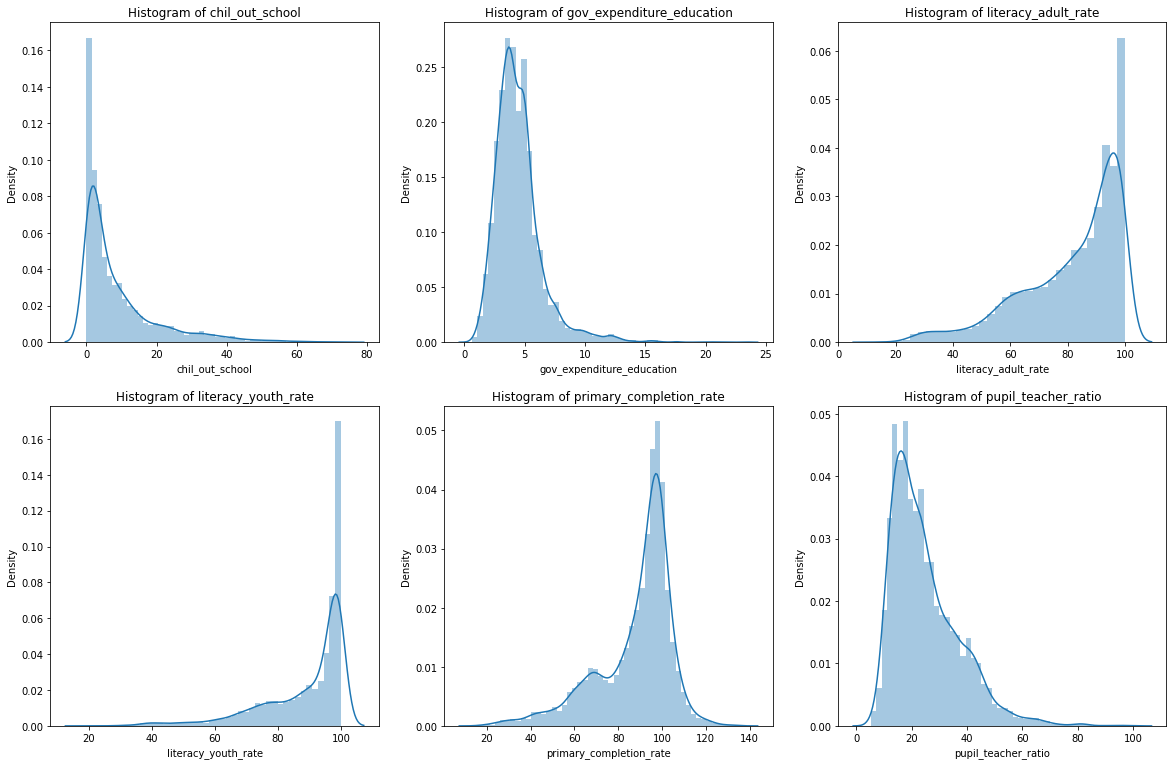

In [ ]:
# Graficamos histogramas con las variables de eduaction 
variables = ['chil_out_school',
       'gov_expenditure_education', 'literacy_adult_rate',
       'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio']
plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(3,3,i)
    sns.distplot(a = education_regions[var])
    title_string = 'Histogram of ' + var
    plt.title(title_string)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


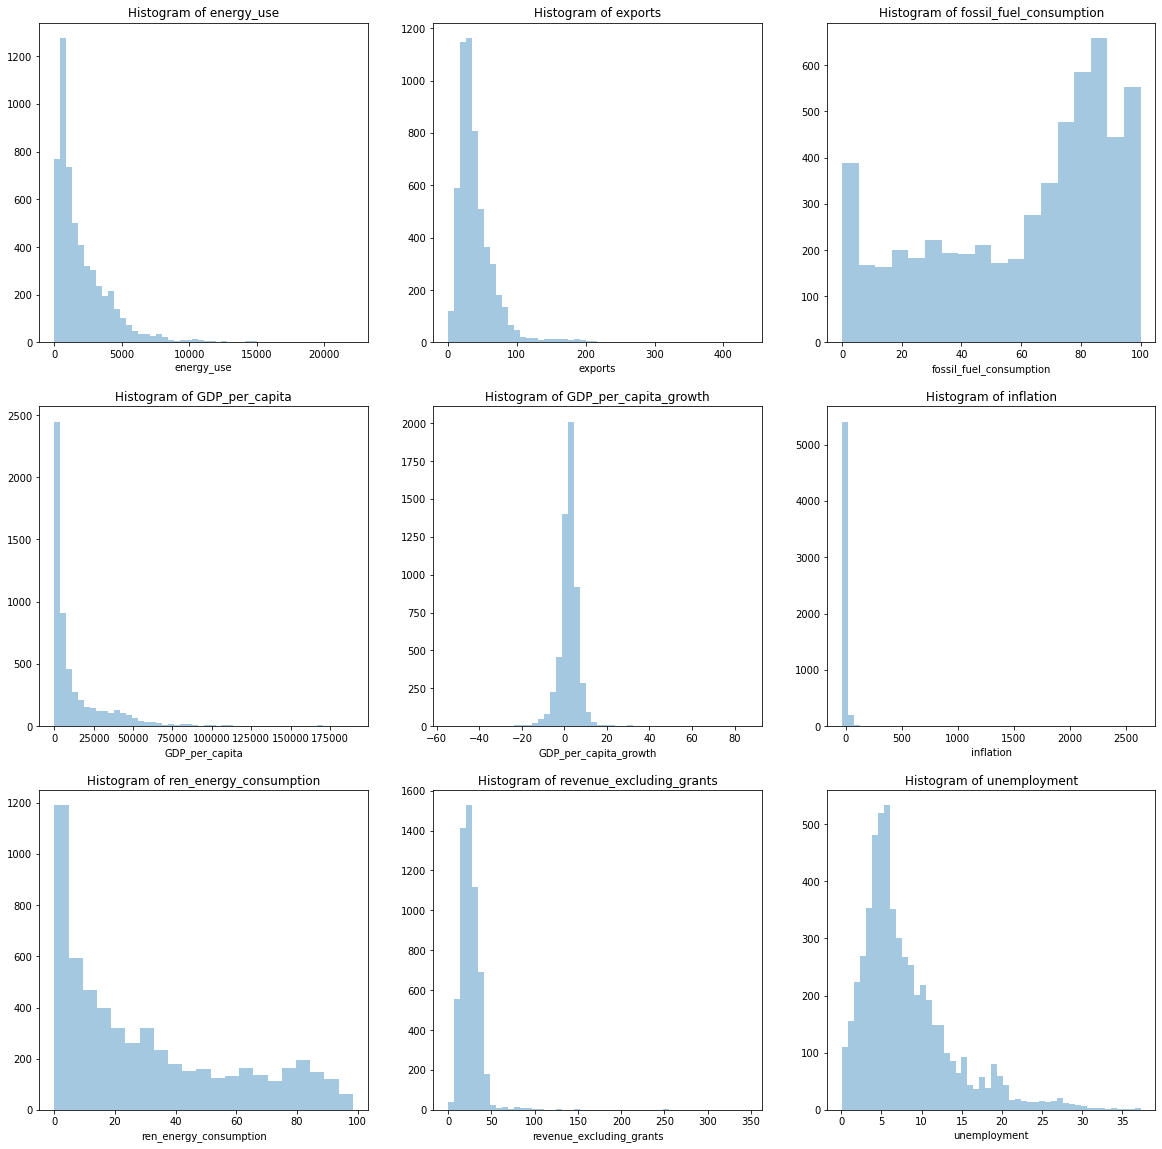

In [ ]:
variables = ['energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment']
plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(3,3,i)
    sns.distplot(a = economy_regions[var], rug=False, kde=False)
    title_string = 'Histogram of ' + var
    plt.title(title_string)

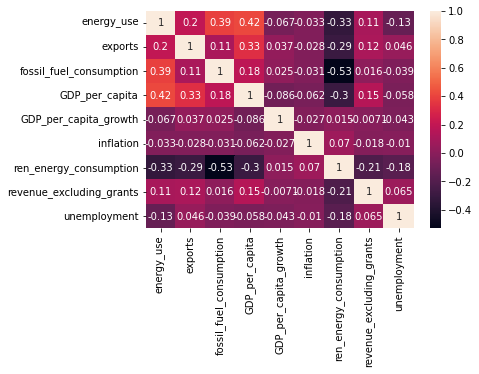

In [ ]:
sns.heatmap(economy_regions.corr(), annot=True)

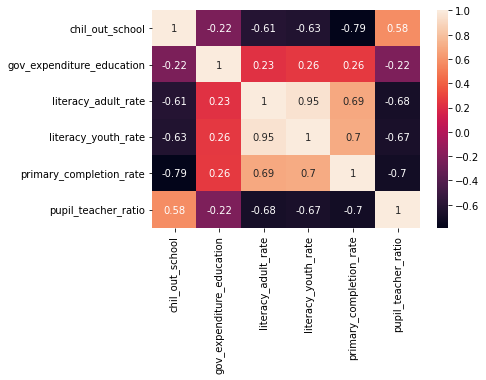

In [ ]:
sns.heatmap(education_regions.corr(), annot=True)

## Distribución Mortalidad


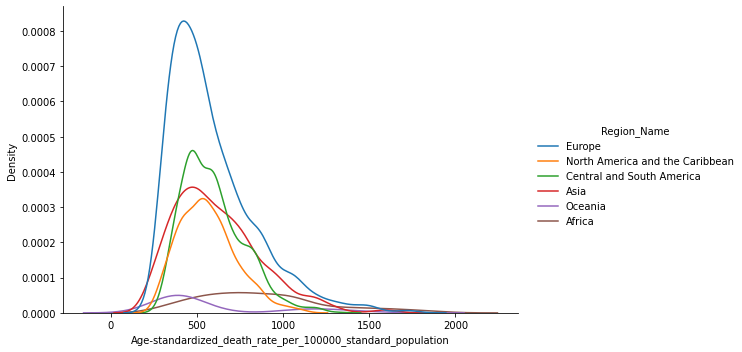

In [ ]:
sns.displot(data=Mortalidad, x='Age-standardized_death_rate_per_100000_standard_population', hue='Region_Name', kind='kde', fill=False, height=5, aspect=1.5)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

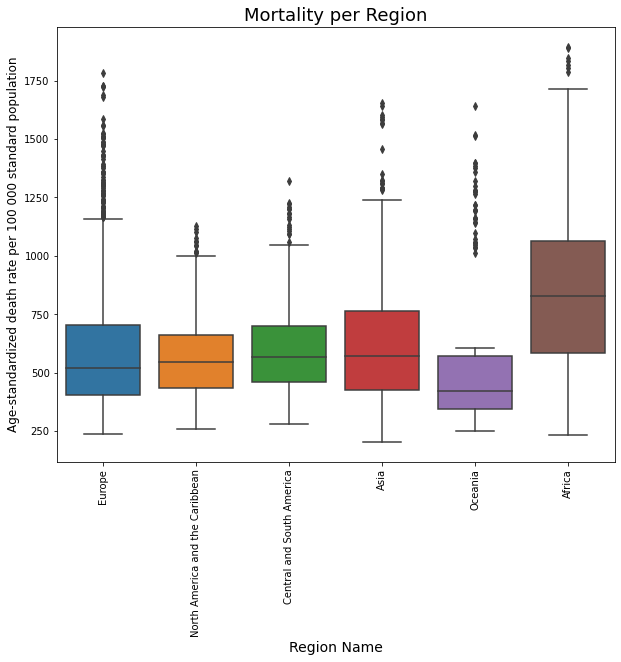

In [ ]:
# Graficamos con un diagrama de cajas o bigotes para representar los grupos de datos numéricos a través de sus cuartiles
plt.figure(figsize=(10, 8))
sns.boxplot(x="Region_Name", 
            y="Age-standardized_death_rate_per_100000_standard_population", 
            data=Mortalidad)
plt.ylabel("Age-standardized death rate per 100 000 standard population", size=12)
plt.xlabel("Region Name", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)

In [ ]:
Mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125895 entries, 693 to 300257
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Region_Name                                                 125895 non-null  object 
 1   Country_Name                                                125895 non-null  object 
 2   Year                                                        125895 non-null  int64  
 3   Sex                                                         125895 non-null  object 
 4   Age_Group                                                   125895 non-null  object 
 5   Number_of_deaths                                            125325 non-null  float64
 6   Age-standardized_death_rate_per_100000_standard_population  5634 non-null    float64
 7   Death_rate_per_100000population                             111678 non-nu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

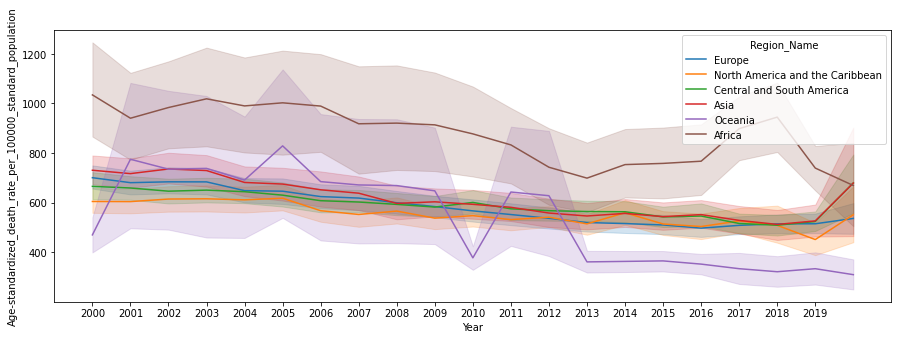

In [ ]:
# Llamamos .figure para delimitar nuestro campo de trabajo  
# y luego .lineplot para graficar un gráfico de lineas donde se puedan visualizar correctamente las relaciones estadísticas 

plt.figure(figsize=(15, 5))
g = sns.lineplot('Year', 'Age-standardized_death_rate_per_100000_standard_population', hue='Region_Name', 
             data=Mortalidad)
g.set_xticks(range(2000,2020))
g.set_xticklabels(['2000','2001','2002','2003','2004','2005','2006','2007' ,'2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])

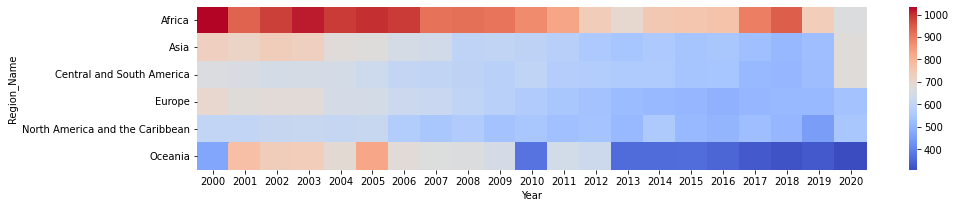

In [ ]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"]
pivoted_df = pd.pivot_table(data=Mortalidad, index="Region_Name", columns="Year", values="Age-standardized_death_rate_per_100000_standard_population")
pivoted_df.head(10)

plt.figure(figsize=(15, 3)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

In [ ]:
education_regions.columns

Index(['region', 'income', 'country', 'year', 'chil_out_school',
       'gov_expenditure_education', 'literacy_adult_rate',
       'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio'],
      dtype='object')

In [ ]:
education

country       year  chil_out_school  gov_expenditure_education  \
0     Afghanistan 2000-12-31              NaN                        NaN   
1     Afghanistan 2001-12-31              NaN                        NaN   
2     Afghanistan 2002-12-31              NaN                        NaN   
3     Afghanistan 2003-12-31              NaN                        NaN   
4     Afghanistan 2004-12-31              NaN                        NaN   
...           ...        ...              ...                        ...   
5847     Zimbabwe 2017-12-31         15.51343                    5.81878   
5848     Zimbabwe 2018-12-31         15.30251                    3.86611   
5849     Zimbabwe 2019-12-31         15.13754                    3.86611   
5850     Zimbabwe 2020-12-31         13.63717                    3.86611   
5851     Zimbabwe 2021-12-31         13.63717                    3.86611   

      literacy_adult_rate  literacy_youth_rate  primary_completion_rate  \
0                     NaN                  NaN                      NaN   
1                     NaN                  NaN                      NaN   
2                     NaN                  NaN                      NaN   
3                     NaN                  NaN                      NaN   
4                     NaN                  NaN                      NaN   
...                   ...                  ...                      ...   
5847             88.69342            90.428123                95.476372   
5848             88.69342            90.428123                92.195152   
5849             88.69342            90.428123                88.508812   
5850             88.69342            90.428123                90.017349   
5851             88.69342            90.428123                90.017349   

      pupil_teacher_ratio  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
5847              36.4082  
5848              36.4082  
5849              36.4082  
5850              36.4082  
5851              36.4082  

[5852 rows x 8 columns]

In [ ]:
##DICCIONARIO
education.country.unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominica

In [ ]:
economy.country.unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Cote d`Ivoire', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dom

In [ ]:
Mortalidad.Country_Name.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Republic of Korea', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Republic of Moldova',
       'Mongoli

In [ ]:
Dict = {'Albania':'Albania', 'Antigua and Barbuda':'Antigua and Barbuda', 
        'Argentina':'Argentina','Armenia':'Armenia', 'Australia':'Australia',
        'Austria':'Austria', 'Azerbaijan':'Azerbaijan','Bahamas':'Bahamas',
        'Bahrain':'Bahrain', 'Barbados':'Barbados', 'Belarus':'Belarus', 
        'Belgium':'Belgium', 'Belize':'Belize', 'Bosnia and Herzegovina':'Bosnia and Herzegovina',
        'Brazil':'Brazil','Brunei Darussalam':'Brunei Darussalam', 'Bulgaria':'Bulgaria',
        'Cabo Verde':'Cabo Verde', 'Canada':'Canada', 'Chile':'Chile', 'Colombia':'Colombia', 
        'Costa Rica':'Costa Rica', 'Croatia':'Croatia', 'Cuba':'Cuba', 'Cyprus':'Cyprus', 
        'Czechia':'Czech Republic', 'Denmark':'Denmark','Dominica':'Dominica', 
        'Dominican Republic':'Dominican Republic', 'Ecuador':'Ecuador', 'Egypt':'Egypt',
        'El Salvador':'El Salvador', 'Estonia':'Estonia', 'Fiji':'Fiji', 'Finland':'Finland', 
        'France':'France', 'Georgia':'Georgia', 'Germany':'Germany', 'Greece':'Greece', 
        'Grenada':'Grenada', 'Guatemala':'Guatemala', 'Guyana':'Guyana', 'China, Hong Kong SAR':'Hong Kong SAR, China', 
        'Hungary':'Hungary', 'Iceland':'Iceland', 'Iran (Islamic Republic of)':'Iran, Islamic Rep.', 
        'Iraq':'Iraq', 'Ireland':'Ireland', 'Israel':'Israel', 'Italy':'Italy', 'Jamaica':'Jamaica', 
        'Japan':'Japan', 'Kazakhstan':'Kazakhstan', 'Republic of Korea':"Korea, Dem. People's Rep.", 
        'Kuwait':'Kuwait', 'Kyrgyzstan':'Kyrgyz Republic', 'Latvia':'Latvia', 'Lebanon':'Lebanon',
        'Lithuania':'Lithuania', 'Luxembourg':'Luxembourg', 'Maldives':'Maldives', 'Malta':'Malta', 
       'Mauritius':'Mauritius', 'Mexico': 'Mexico', 'Republic of Moldova':'Moldova',
       'Mongolia':'Mongolia', 'Montenegro':'Montenegro', 'Netherlands':'Netherlands', 'New Zealand':'New Zealand',
       'Nicaragua':'Nicaragua', 'North Macedonia':'North Macedonia', 'Norway':'Norway', 'Panama':'Panama', 'Paraguay':'Paraguay',
       'Peru':'Peru', 'Philippines':'Philippines', 'Poland':'Poland', 'Portugal':'Portugal', 'Puerto Rico':'Puerto Rico',
       'Romania':'Romania', 'Russian Federation':'Russian Federation',
       'Saint Kitts and Nevis':'St. Kitts and Nevis', 'Saint Lucia':'St. Lucia',
       'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines', 'Serbia':'Serbia', 'Seychelles':'Seychelles',
       'Singapore':'Singapore', 'Slovakia':'Slovakia', 'Slovenia':'Slovenia', 'South Africa':'South Africa', 'Spain':'Spain',
       'Sri Lanka':'Sri Lanka', 'Suriname':'Suriname', 'Sweden':'Sweden', 'Switzerland':'Switzerland',
       'Syrian Arab Republic':'Syrian Arab Republic', 'Tajikistan':'Tajikistan', 'Thailand':'Thailand',
       'Trinidad and Tobago':'Trinidad and Tobago', 'Turkey':'Turkiye', 'Turkmenistan':'Turkmenistan', 'Ukraine':'Ukraine',
       'United Kingdom':'United Kingdom', 'United States of America':'United States', 'Uruguay':'Uruguay',
       'Uzbekistan':'Uzbekistan', 'Venezuela':'Venezuela', 'Jordan':'Jordan'}

In [ ]:
Mortalidad["Country_Name"] = Mortalidad["Country_Name"].replace(Dict)
Mortalidad[Mortalidad["Country_Name"]=='Iran, Islamic Rep.']
MergePrevious = pd.merge(education,economy)
#MergePrevious
MergeTable = pd.merge(MergePrevious,Mortalidad,left_on='country', right_on='Country_Name')
MergeTable.drop("country", axis=1,inplace=True)
MergeTable

year  chil_out_school  gov_expenditure_education  \
0       2000-12-31         4.616650                    3.43017   
1       2000-12-31         4.616650                    3.43017   
2       2000-12-31         4.616650                    3.43017   
3       2000-12-31         4.616650                    3.43017   
4       2000-12-31         4.616650                    3.43017   
...            ...              ...                        ...   
2574259 2021-12-31         0.805045                    5.96321   
2574260 2021-12-31         0.805045                    5.96321   
2574261 2021-12-31         0.805045                    5.96321   
2574262 2021-12-31         0.805045                    5.96321   
2574263 2021-12-31         0.805045                    5.96321   

         literacy_adult_rate  literacy_youth_rate  primary_completion_rate  \
0                  97.377179            98.489373                96.582687   
1                  97.377179            98.489373                96.582687   
2                  97.377179            98.489373                96.582687   
3                  97.377179            98.489373                96.582687   
4                  97.377179            98.489373                96.582687   
...                      ...                  ...                      ...   
2574259            93.828534            97.657089                99.056416   
2574260            93.828534            97.657089                99.056416   
2574261            93.828534            97.657089                99.056416   
2574262            93.828534            97.657089                99.056416   
2574263            93.828534            97.657089                99.056416   

         pupil_teacher_ratio  energy_use    exports  fossil_fuel_consumption  \
0                  22.567840  580.494764  20.115286                58.715098   
1                  22.567840  580.494764  20.115286                58.715098   
2                  22.567840  580.494764  20.115286                58.715098   
3                  22.567840  580.494764  20.115286                58.715098   
4                  22.567840  580.494764  20.115286                58.715098   
...                      ...         ...        ...                      ...   
2574259            22.289115  636.396193  23.739155                37.591731   
2574260            22.289115  636.396193  23.739155                37.591731   
2574261            22.289115  636.396193  23.739155                37.591731   
2574262            22.289115  636.396193  23.739155                37.591731   
2574263            22.289115  636.396193  23.739155                37.591731   

         ...  revenue_excluding_grants  unemployment  Region_Name  \
0        ...                 23.950911        19.028       Europe   
1        ...                 23.950911        19.028       Europe   
2        ...                 23.950911        19.028       Europe   
3        ...                 23.950911        19.028       Europe   
4        ...                 23.950911        19.028       Europe   
...      ...                       ...           ...          ...   
2574259  ...                 21.308806         7.161         Asia   
2574260  ...                 21.308806         7.161         Asia   
2574261  ...                 21.308806         7.161         Asia   
2574262  ...                 21.308806         7.161         Asia   
2574263  ...                 21.308806         7.161         Asia   

         Country_Name  Year     Sex  Age_Group Number_of_deaths  \
0             Albania  2000     All      [All]          16411.0   
1             Albania  2000     All        [0]            582.0   
2             Albania  2000     All      [1-4]            343.0   
3             Albania  2000     All      [5-9]            169.0   
4             Albania  2000     All    [10-14]            118.0   
...               ...   ...     ...        ...              ...   
2574259    Uzbekistan  20

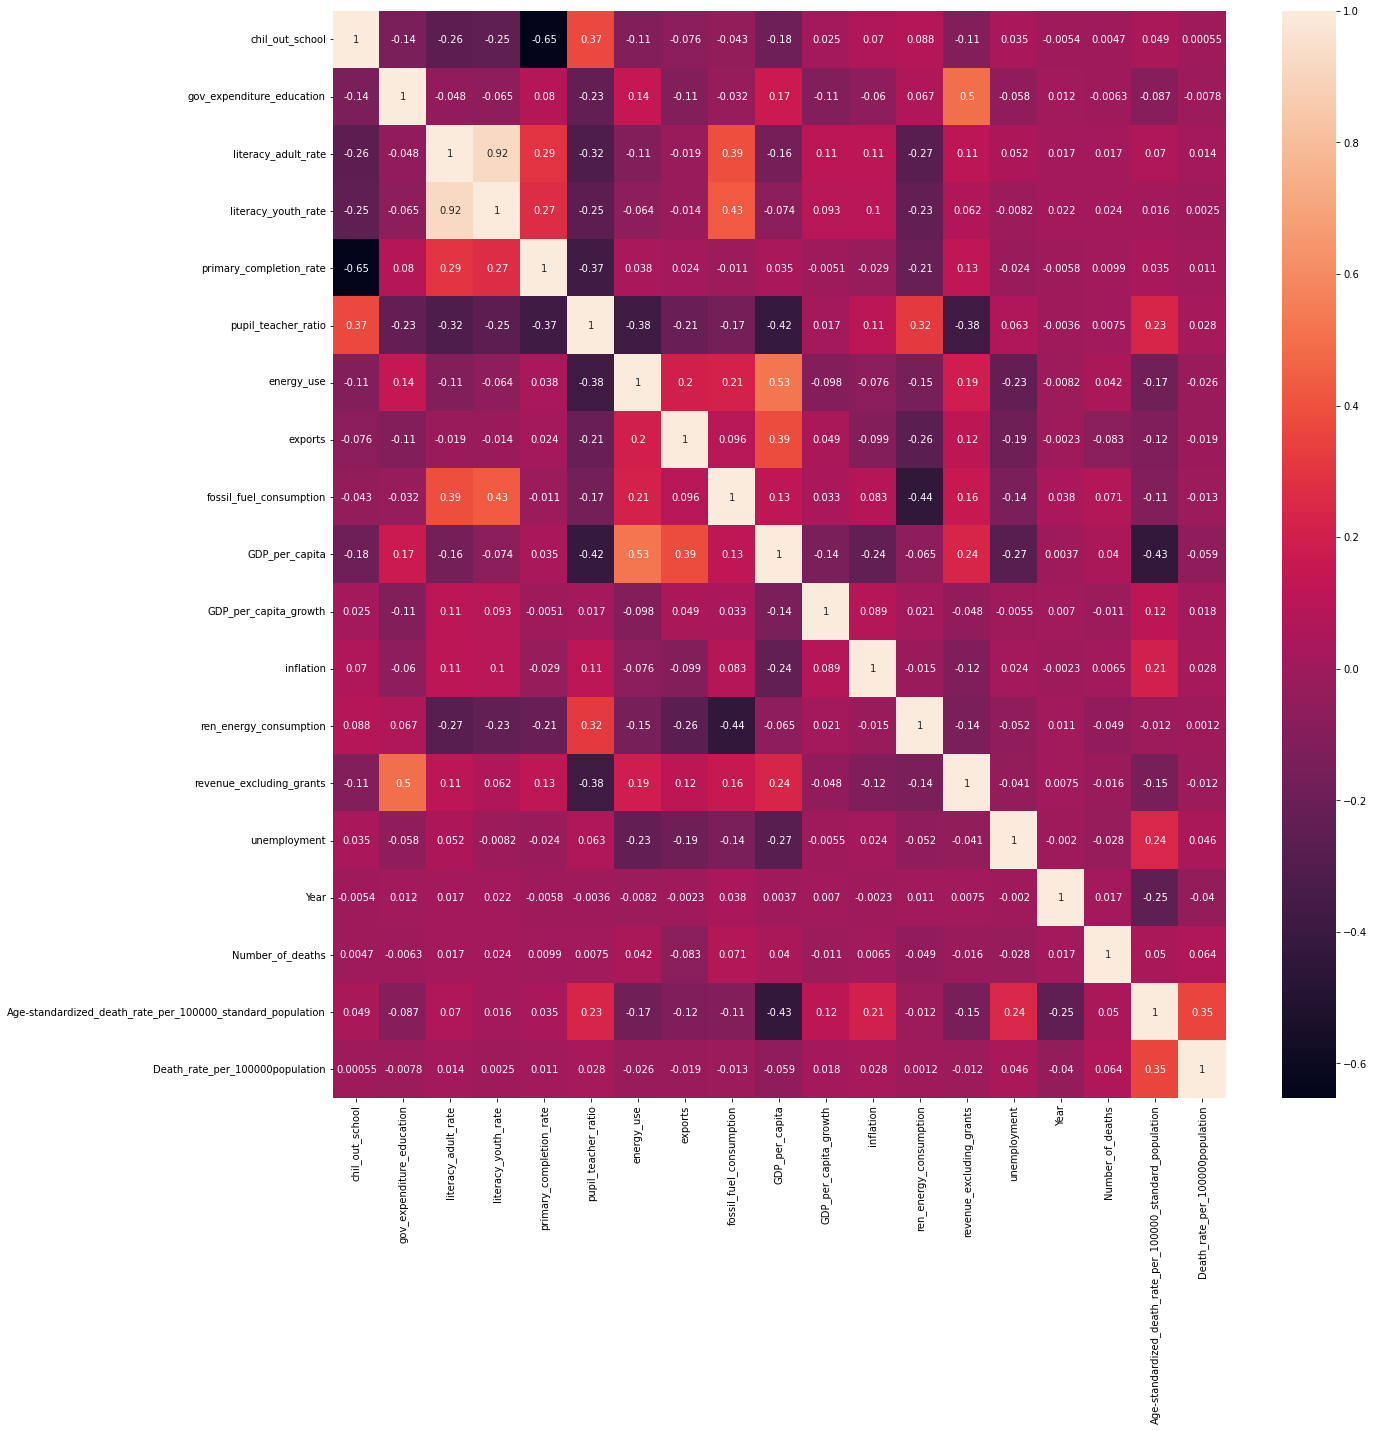

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(MergeTable.corr(), annot=True)

Segun la matrix de correlacion la variable **[Death_rate_per_100000population]** y **[Number_of_deaths]** no ofrecen ningun nivel de correlacion con ninguna de las demas variables, esto por el hecho que estas variables estan categorizadas por rangos de edad en un mismo año a diferencia de las variables educacion o economicas de las cuales solo existe un valor por año. Por lo tanto para los analisis de modelos nuestra variable dependiente (Y) sera **[Age_standardized_death_rate_per_100000_standard_population]** 

Por lo tanto las correlaciones mas significativas seran (y por lo tanto las variables independientes):

**[GDP_per_capita] [-0.43]**

**[unemployment] [+0.24]**

**[inflation] [+0.21]**

**[pupil_teacher_ratio] [+0.23]**

In [ ]:
#fig, ax= plt.subplots(figsize = (20,20))
#sns.scatterplot(data=MergeTable, x="pupil_teacher_ratio", y="ren_energy_consumption", hue=MergeTable["Country_Name"]=="Argentina",ax=ax)

In [ ]:
#fig, ax= plt.subplots(figsize = (20,20))
#sns.scatterplot(data=MergeTable, x="pupil_teacher_ratio", y="ren_energy_consumption", hue="Region_Name", ax=ax)

In [ ]:
Mortalidad_region = Mortalidad.groupby(Mortalidad["Region_Name"])
Mortalidad_region = pd.DataFrame(Mortalidad_region)
Mortalidad_region

0  \
0                           Africa   
1                             Asia   
2        Central and South America   
3                           Europe   
4  North America and the Caribbean   
5                          Oceania   

                                                   1  
0         Region_Name  Country_Name  Year     Sex...  
1         Region_Name Country_Name  Year     Sex ...  
2                        Region_Name Country_Name...  
3         Region_Name    Country_Name  Year     S...  
4                              Region_Name       ...  
5         Region_Name Country_Name  Year     Sex ...

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#import plotly_express as ppt

Text(0.5, 1.0, 'Correlación entre los gastos del gobierno en educación por Region')

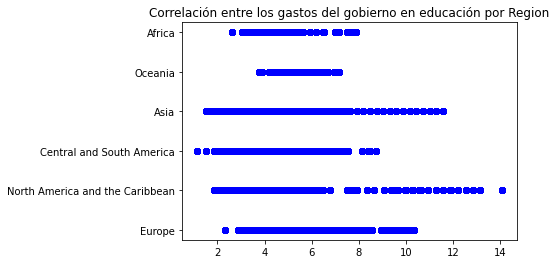

In [ ]:
#gastos del gobierno en educación por Region
x = MergeTable['gov_expenditure_education']
y = MergeTable['Region_Name']
plt.scatter(x, y, color='blue')
plt.title("Correlación entre los gastos del gobierno en educación por Region")

In [ ]:
#fig, ax= plt.subplots(figsize = (20,20))
#sns.scatterplot(data=MergeTable, x="year", y="Number_of_deaths", hue="Region_Name", ax=ax)

Text(0.5, 1.0, 'Correlación entre el uso de la energia por Region')

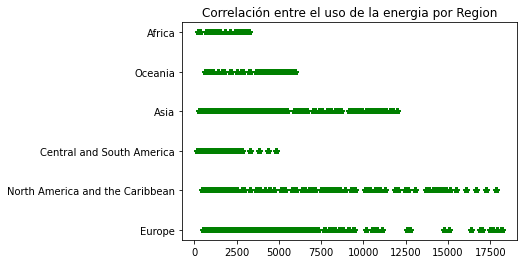

In [ ]:
#Correlación entre el uso de la energia por Region
x = MergeTable['energy_use']
y = MergeTable['Region_Name']

plt.plot(x, y, '*', color='green')
plt.title("Correlación entre el uso de la energia por Region")

MAPAS DE CALOR

Las gráficas de mapas de calor permiten comparar tres variables, dos de tipo categórico ubicadas en los ejes X y Y, la tercer variable es de tipo numérico utilizando un código de color degradado y con esto observar cuáles pares de atributos están correlacionados. Comúnmente se utilizan las visualizaciones de mapas de calor para representar gráficamente la matriz de correlación.

Primero debemos realizar un Pivot el cual prepara la informacion que vamos a analizar como la requerimos
posteriomente creamos el HEATMAP grafico de calor

In [ ]:
#Hacemos un pivot
MergeTable_Pivot = MergeTable.pivot_table(index="Region_Name", columns="Sex", values="Number_of_deaths")
MergeTable_Pivot

Sex                                       All        Female          Male  \
Region_Name                                                                 
Africa                           18495.827298   8885.912721   9561.465181   
Asia                             14883.454173   6724.772069   8158.386155   
Central and South America        16223.490580   7138.175938   9077.278445   
Europe                           21153.263519  10469.346651  10683.914313   
North America and the Caribbean  25081.429372  12417.893958  12662.890756   
Oceania                           6906.406746   3356.549603   3549.857143   

Sex                                 Unknown  
Region_Name                                  
Africa                           155.297619  
Asia                               3.769585  
Central and South America         17.197460  
Europe                             0.258503  
North America and the Caribbean    2.645320  
Oceania                                 NaN

En este mapa de calor analizaremos la cantidad de muertes en la correlacion ente la region y el genero

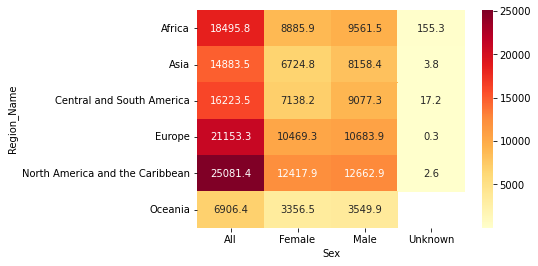

In [ ]:
#Pintamos mapa de calor
sns.heatmap(MergeTable_Pivot, annot=True,fmt=".1f", cmap="YlOrRd")

Pivot con La cantidad de deseempleo corelacionado entre el año y la region

In [ ]:
#Hacemos un pivot
MergeTable_Pivot_Y = MergeTable.pivot_table(index="Year", columns="Region_Name", values="unemployment")
MergeTable_Pivot_Y

Region_Name     Africa      Asia  Central and South America     Europe  \
Year                                                                     
2000         19.059851  6.520062                   7.334277   9.144876   
2001         15.628045  6.606436                   7.537791   9.144876   
2002         15.628045  5.974117                   7.537791   9.144876   
2003         15.628045  6.001608                   7.566885   9.144876   
2004         15.628045  6.211125                   7.566885   9.191612   
2005         15.628045  6.190127                   7.375799   9.209731   
2006         15.628045  6.209902                   7.452567   9.209731   
2007         15.628045  6.282323                   7.396655   9.144876   
2008         15.628045  6.486390                   7.452567   9.128306   
2009         15.628045  6.817009                   7.539513   9.144876   
2010         15.628045  6.837528                   7.495550   8.802893   
2011         14.700028  6.636987                   7.276875   9.076432   
2012         15.628045  6.708379                   7.452567   8.662584   
2013         15.628045  6.825848                   7.578965   8.624431   
2014         15.628045  6.627155                   7.495574   8.510458   
2015         15.628045  7.681682                   7.101011   8.662584   
2016         14.304197  7.621754                   7.046433   9.186244   
2017         14.304197  7.137343                   7.012528   9.682036   
2018         17.646045  7.086950                   7.012528   9.236433   
2019          7.684955  6.887893                   7.189302  10.663320   
2020          7.749409  8.287750                   4.837234  11.487301   

Region_Name  North America and the Caribbean   Oceania  
Year                                                    
2000                               10.656349  5.278318  
2001                               10.772023  4.932561  
2002                               11.081961  4.932561  
2003                               10.831831  4.932561  
2004                               10.829842  4.932561  
2005                               10.856077  4.641523  
2006                               10.979345  4.932561  
2007                               10.135913  4.932561  
2008                               10.925966  4.932561  
2009                               10.910063  4.932561  
2010                               11.245440  5.278318  
2011                               11.090566  4.932561  
2012                               10.993380  4.932561  
2013                               11.186418  5.278318  
2014                               11.615460  5.278318  
2015                               11.481845  5.278318  
2016                                9.882312  5.278318  
2017                               10.135459  5.514636  
2018                                7.830359  5.514636  
2019                                5.193015  5.514636  
2020                                5.961545  5.514636

Mapa de calor con La cantidad de deseempleo corelacionado entre el año y la region

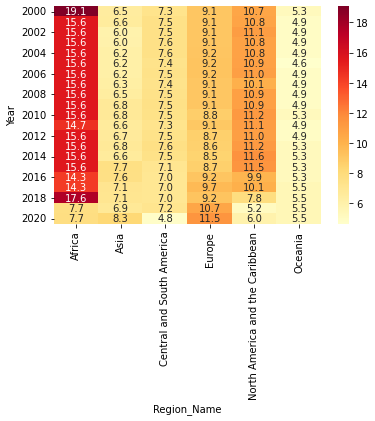

In [ ]:
sns.heatmap(MergeTable_Pivot_Y, annot=True,fmt=".1f", cmap="YlOrRd", annot_kws={"size":10} )

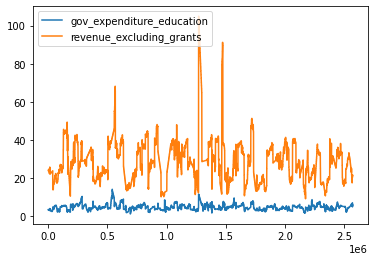

In [ ]:
#gov_expenditure_education vs revenue_expenditure_grants
data = MergeTable[{"gov_expenditure_education","revenue_excluding_grants"}]
data.plot()

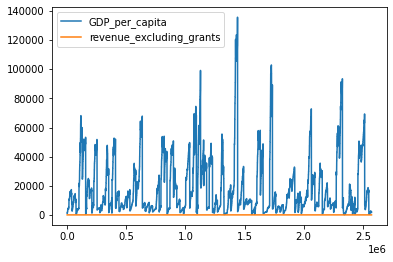

In [ ]:
data = MergeTable[{"GDP_per_capita","revenue_excluding_grants"}]
data.plot()

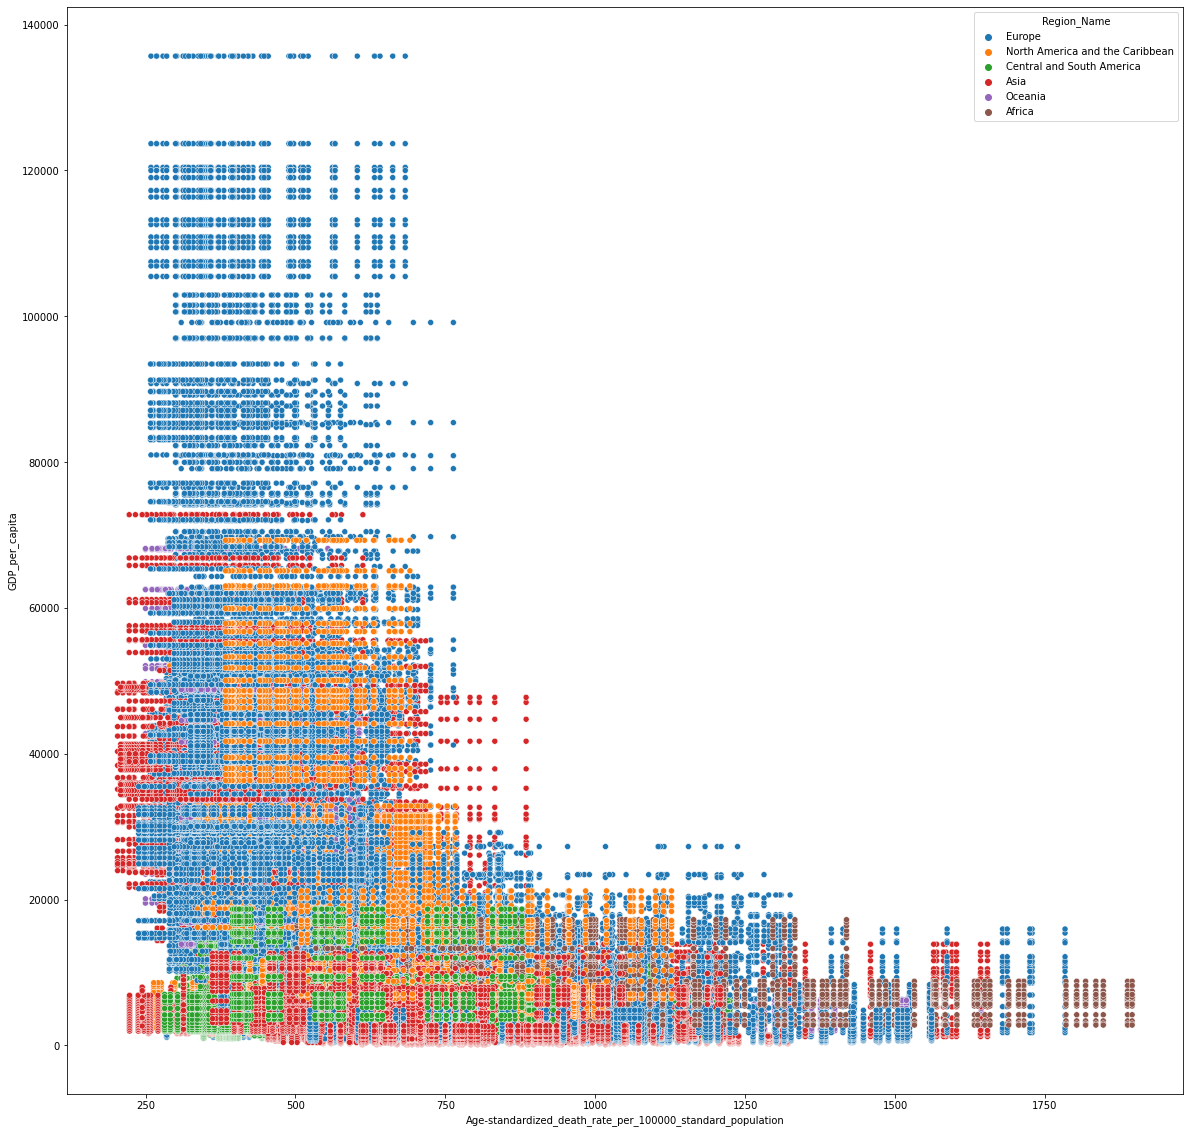

In [ ]:
fig, ax= plt.subplots(figsize = (20,20))
sns.scatterplot(data=MergeTable, x="Age-standardized_death_rate_per_100000_standard_population", y="GDP_per_capita", hue="Region_Name", ax=ax,)

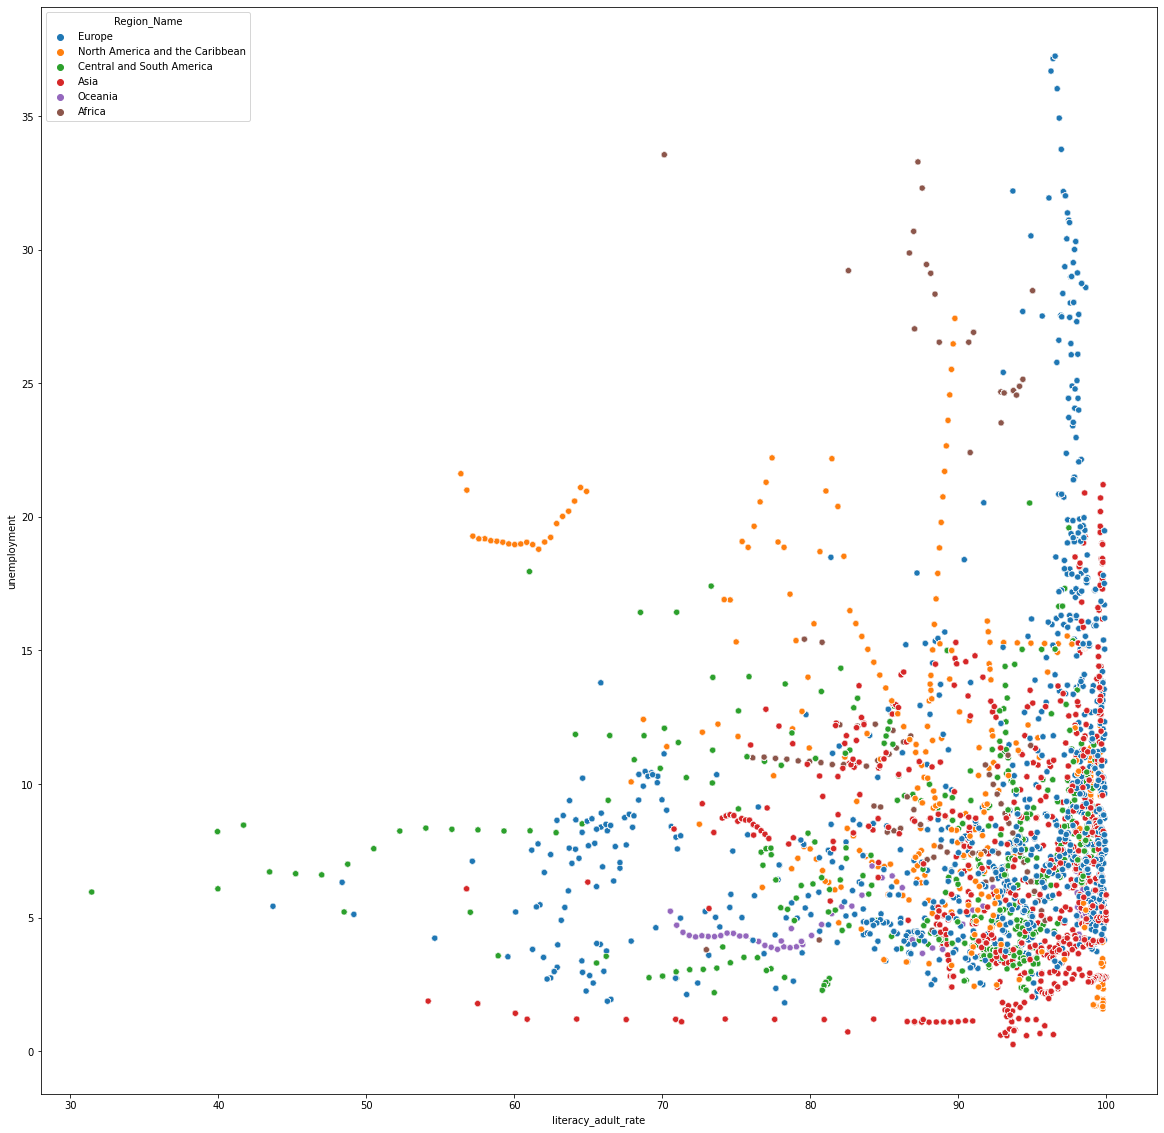

In [ ]:
fig, ax= plt.subplots(figsize = (20,20))
sns.scatterplot(data=MergeTable, x="literacy_adult_rate", y="unemployment", hue="Region_Name", ax=ax,)

In [ ]:
education_regions['year'] = pd.DatetimeIndex(education_regions['year']).year
education_regions.head(3)

region       income country  year  chil_out_school  \
0  Latin America & Caribbean  High income   Aruba  2000          1.60268   
1  Latin America & Caribbean  High income   Aruba  2001          0.32258   
2  Latin America & Caribbean  High income   Aruba  2002          1.81634   

   gov_expenditure_education  literacy_adult_rate  literacy_youth_rate  \
0                    4.71468            97.291252            99.026413   
1                    4.73986            97.244391            99.037613   
2                    4.92365            97.197530            99.048813   

   primary_completion_rate  pupil_teacher_ratio  
0                97.142860             19.05967  
1                94.404068             18.94779  
2                94.755241             19.06977

In [ ]:
economy_regions['year'] = pd.DatetimeIndex(economy_regions['year']).year
economy_regions.head(3)

region       income country  year   energy_use  \
0  Latin America & Caribbean  High income   Aruba  2000  2250.084570   
1  Latin America & Caribbean  High income   Aruba  2001  2404.356405   
2  Latin America & Caribbean  High income   Aruba  2002  2558.628241   

     exports  fossil_fuel_consumption  GDP_per_capita  GDP_per_capita_growth  \
0  74.410975                78.499546    20614.799348               5.417262   
1  70.986745                78.991756    20417.775962               1.923420   
2  64.550114                79.483967    20654.488517              -3.147310   

   inflation  ren_energy_consumption  revenue_excluding_grants  unemployment  
0   1.027583                    0.18                 24.293584     20.261478  
1  -2.824825                    0.18                 24.367544     19.625956  
2   4.446604                    0.18                 24.441504     18.990434

In [ ]:
Mortalidad_all = Mortalidad[Mortalidad.Sex == 'All']


In [ ]:
merged_variables = economy_regions.merge(education_regions, on = ['region', 'income', 'country', 'year'])


In [ ]:
Mortalidad_all.columns = ['continent', 'country', 'year', 'Sex', 'Age_Group',
       'Number_of_deaths',
       'Age-standardized',
       'Death_rate']

In [ ]:
complete_data = merged_variables.merge(Mortalidad_all, how = 'inner', on= ['country' , 'year'])
complete_data

region               income       country  year  \
0      Europe & Central Asia  Upper middle income       Albania  2000   
1      Europe & Central Asia  Upper middle income       Albania  2000   
2      Europe & Central Asia  Upper middle income       Albania  2000   
3      Europe & Central Asia  Upper middle income       Albania  2000   
4      Europe & Central Asia  Upper middle income       Albania  2000   
...                      ...                  ...           ...   ...   
36976     Sub-Saharan Africa  Upper middle income  South Africa  2018   
36977     Sub-Saharan Africa  Upper middle income  South Africa  2018   
36978     Sub-Saharan Africa  Upper middle income  South Africa  2018   
36979     Sub-Saharan Africa  Upper middle income  South Africa  2018   
36980     Sub-Saharan Africa  Upper middle income  South Africa  2018   

        energy_use    exports  fossil_fuel_consumption  GDP_per_capita  \
0       580.494764  20.115286                58.715098     1126.683340   
1       580.494764  20.115286                58.715098     1126.683340   
2       580.494764  20.115286                58.715098     1126.683340   
3       580.494764  20.115286                58.715098     1126.683340   
4       580.494764  20.115286                58.715098     1126.683340   
...            ...        ...                      ...             ...   
36976  1544.808518  27.488588                74.307194     7005.095413   
36977  1544.808518  27.488588                74.307194     7005.095413   
36978  1544.808518  27.488588                74.307194     7005.095413   
36979  1544.808518  27.488588                74.307194     7005.095413   
36980  1544.808518  27.488588                74.307194     7005.095413   

       GDP_per_capita_growth  inflation  ...  literacy_adult_rate  \
0                   7.630022   5.647471  ...            97.377179   
1                   7.630022   5.647471  ...            97.377179   
2                   7.630022   5.647471  ...            97.377179   
3                   7.630022   5.647471  ...            97.377179   
4                   7.630022   5.647471  ...            97.377179   
...                      ...        ...  ...                  ...   
36976               0.113021   3.956474  ...            91.034821   
36977               0.113021   3.956474  ...            91.034821   
36978               0.113021   3.956474  ...            91.034821   
36979               0.113021   3.956474  ...            91.034821   
36980               0.113021   3.956474  ...            91.034821   

       literacy_youth_rate  primary_completion_rate  pupil_teacher_ratio  \
0                98.489373                96.582687            22.567840   
1                98.489373                96.582687            22.567840   
2                98.489373                96.582687            22.567840   
3                98.489373                96.582687            22.567840   
4                98.489373                96.582687            22.567840   
...                    ...                      ...                  ...   
36976            96.866676                90.344498            34.424059   
36977            96.866676                90.344498            34.424059   
36978            96.866676                90.344498            34.424059   
36979            96.866676                90.344498            34.424059   
36980            96.866676                90.344498            34.424059   

       continent  Sex  Age_Group  Number_of_deaths  Age-standardized  \
0         Europe  All      [All]           16411.0        697.153727   
1         Europe  All        [0]             582.0               NaN   
2         Europe  All      [1-4]             343.0               NaN   
3         Europe  All      [5-9]             169.0               NaN   
4         Europe  All    [10-14]             118.0               NaN   
...          ...  ...        ...               ...               ...   
36976     

In [ ]:
complete_data.corr()['Age-standardized'].to_frame().sort_values(by = 'Age-standardized', ascending = False)

In [ ]:
Mortalidad.columns = ['continent', 'country', 'year', 'sex', 'Age_Group',
       'Number_of_deaths',
       'Age-standardized',
       'Death_rate']

In [ ]:
 Mortalidad = Mortalidad.drop('Number_of_deaths', axis=1)
 Mortalidad

continent        country  year     sex  \
693                              Europe        Albania  2000     All   
694                              Europe        Albania  2000     All   
695                              Europe        Albania  2000     All   
696                              Europe        Albania  2000     All   
697                              Europe        Albania  2000     All   
...                                 ...            ...   ...     ...   
300253  North America and the Caribbean  United States  2020  Female   
300254  North America and the Caribbean  United States  2020  Female   
300255  North America and the Caribbean  United States  2020  Female   
300256  North America and the Caribbean  United States  2020  Female   
300257  North America and the Caribbean  United States  2020  Female   

        Age_Group  Age-standardized    Death_rate  
693         [All]        697.153727    527.007065  
694           [0]               NaN   1030.088496  
695         [1-4]               NaN    131.367292  
696         [5-9]               NaN     46.441330  
697       [10-14]               NaN     35.150432  
...           ...               ...           ...  
300253    [70-74]               NaN   2060.564427  
300254    [75-79]               NaN   3378.050596  
300255    [80-84]               NaN   5766.145390  
300256      [85+]               NaN  14557.669585  
300257  [Unknown]               NaN           NaN  

[125895 rows x 7 columns]

In [ ]:
merged_variables['sex'] = 'All'
merged_variables['Age_Group'] = '[All]'
merged_variables


region               income   country  year  \
0     Latin America & Caribbean          High income     Aruba  2000   
1     Latin America & Caribbean          High income     Aruba  2001   
2     Latin America & Caribbean          High income     Aruba  2002   
3     Latin America & Caribbean          High income     Aruba  2003   
4     Latin America & Caribbean          High income     Aruba  2004   
...                         ...                  ...       ...   ...   
5627         Sub-Saharan Africa  Lower middle income  Zimbabwe  2017   
5628         Sub-Saharan Africa  Lower middle income  Zimbabwe  2018   
5629         Sub-Saharan Africa  Lower middle income  Zimbabwe  2019   
5630         Sub-Saharan Africa  Lower middle income  Zimbabwe  2020   
5631         Sub-Saharan Africa  Lower middle income  Zimbabwe  2021   

       energy_use    exports  fossil_fuel_consumption  GDP_per_capita  \
0     2250.084570  74.410975                78.499546    20614.799348   
1     2404.356405  70.986745                78.991756    20417.775962   
2     2558.628241  64.550114                79.483967    20654.488517   
3     2712.900076  62.722055                79.976177    21070.071722   
4     2867.171912  64.667988                80.468387    22834.284649   
...           ...        ...                      ...             ...   
5627   845.359435  19.658905                29.095759     1235.189032   
5628   845.359435  28.049757                29.095759     1254.642265   
5629   845.359435  31.251040                29.095759     1316.740657   
5630   845.359435  37.202235                29.095759     1214.509820   
5631   845.359435  37.202235                29.095759     1737.173977   

      GDP_per_capita_growth   inflation  ...  revenue_excluding_grants  \
0                  5.417262    1.027583  ...                 24.293584   
1                  1.923420   -2.824825  ...                 24.367544   
2                 -3.147310    4.446604  ...                 24.441504   
3                 -0.988759    3.030798  ...                 24.515464   
4                  5.403630    2.817214  ...                 24.589424   
...                     ...         ...  ...                       ...   
5627               3.192453    2.437608  ...                 17.304538   
5628               3.356166   59.803356  ...                 15.304165   
5629              -7.468627  440.829791  ...                 15.304165   
5630              -7.620388  558.560024  ...                 15.304165   
5631               4.241610  140.679741  ...                 15.304165   

      unemployment  chil_out_school  gov_expenditure_education  \
0        20.261478          1.60268                   4.714680   
1        19.625956          0.32258                   4.739860   
2        18.990434          1.81634                   4.923650   
3        18.354913          3.32156                   4.666065   
4        17.719391          2.17652                   4.408480   
...            ...              ...                        ...   
5627      4.785000         15.51343                   5.818780   
5628      4.796000         15.30251                   3.866110   
5629      4.833000         15.13754                   3.866110   
5630      5.351000         13.63717                   3.866110   
5631      5.174000         13.63717                   3.866110   

      literacy_adult_rate  literacy_youth_rate  primary_completion_rate  \
0               97.291252            99.026413                97.142860   
1               97.244391            99.037613                94.404068   
2               97.197530            99.048813                94.755241   
3               97.150668            99.060013                90.215919   
4               97.103807            99.071213                90.559898   
...                   ...                  ...                      ...   
5627            88.693420            90.428123                95.476372   
5

In [ ]:
tabla_completa = Mortalidad.merge(merged_variables, how = 'left',  on=['country' , 'year', 'sex' , 'Age_Group'])
tabla_completa

continent        country  year     sex  \
0                                Europe        Albania  2000     All   
1                                Europe        Albania  2000     All   
2                                Europe        Albania  2000     All   
3                                Europe        Albania  2000     All   
4                                Europe        Albania  2000     All   
...                                 ...            ...   ...     ...   
125890  North America and the Caribbean  United States  2020  Female   
125891  North America and the Caribbean  United States  2020  Female   
125892  North America and the Caribbean  United States  2020  Female   
125893  North America and the Caribbean  United States  2020  Female   
125894  North America and the Caribbean  United States  2020  Female   

        Age_Group  Age-standardized    Death_rate                 region  \
0           [All]        697.153727    527.007065  Europe & Central Asia   
1             [0]               NaN   1030.088496                    NaN   
2           [1-4]               NaN    131.367292                    NaN   
3           [5-9]               NaN     46.441330                    NaN   
4         [10-14]               NaN     35.150432                    NaN   
...           ...               ...           ...                    ...   
125890    [70-74]               NaN   2060.564427                    NaN   
125891    [75-79]               NaN   3378.050596                    NaN   
125892    [80-84]               NaN   5766.145390                    NaN   
125893      [85+]               NaN  14557.669585                    NaN   
125894  [Unknown]               NaN           NaN                    NaN   

                     income  energy_use  ...  inflation  \
0       Upper middle income  580.494764  ...   5.647471   
1                       NaN         NaN  ...        NaN   
2                       NaN         NaN  ...        NaN   
3                       NaN         NaN  ...        NaN   
4                       NaN         NaN  ...        NaN   
...                     ...         ...  ...        ...   
125890                  NaN         NaN  ...        NaN   
125891                  NaN         NaN  ...        NaN   
125892                  NaN         NaN  ...        NaN   
125893                  NaN         NaN  ...        NaN   
125894                  NaN         NaN  ...        NaN   

        ren_energy_consumption  revenue_excluding_grants  unemployment  \
0                        41.36                 23.950911        19.028   
1                          NaN                       NaN           NaN   
2                          NaN                       NaN           NaN   
3                          NaN                       NaN           NaN   
4                          NaN                       NaN           NaN   
...                        ...                       ...           ...   
125890                     NaN                       NaN           NaN   
125891                     NaN                       NaN           NaN   
125892                     NaN                       NaN           NaN   
125893                     NaN                       NaN           NaN   
125894                     NaN                       NaN           NaN   

        chil_out_school  gov_expenditure_education  literacy_adult_rate  \
0               4.61665                    3.43017            97.377179   
1                   NaN                        NaN                  NaN   
2                   NaN                        NaN                  NaN   
3                   NaN                        NaN                  NaN   
4                   NaN                        NaN                  NaN   
...                 ...                        ...                  ...   
125890              NaN                        NaN                  NaN   
125891              NaN                        NaN    

In [ ]:
tabla_completa.corr()['Death_rate'].to_frame().sort_values(by='Death_rate', ascending = False)

Death_rate
Death_rate                   1.000000
Age-standardized             0.347759
revenue_excluding_grants     0.319097
unemployment                 0.258178
literacy_adult_rate          0.172934
gov_expenditure_education    0.136433
GDP_per_capita_growth        0.121761
primary_completion_rate      0.114504
literacy_youth_rate          0.081845
fossil_fuel_consumption      0.068324
inflation                    0.055485
GDP_per_capita               0.042072
energy_use                   0.035062
year                        -0.037623
exports                     -0.046818
ren_energy_consumption      -0.063931
chil_out_school             -0.112413
pupil_teacher_ratio         -0.341679

In [ ]:
tabla_completa

continent        country  year     sex  \
0                                Europe        Albania  2000     All   
1                                Europe        Albania  2000     All   
2                                Europe        Albania  2000     All   
3                                Europe        Albania  2000     All   
4                                Europe        Albania  2000     All   
...                                 ...            ...   ...     ...   
125890  North America and the Caribbean  United States  2020  Female   
125891  North America and the Caribbean  United States  2020  Female   
125892  North America and the Caribbean  United States  2020  Female   
125893  North America and the Caribbean  United States  2020  Female   
125894  North America and the Caribbean  United States  2020  Female   

        Age_Group  Age-standardized    Death_rate                 region  \
0           [All]        697.153727    527.007065  Europe & Central Asia   
1             [0]               NaN   1030.088496                    NaN   
2           [1-4]               NaN    131.367292                    NaN   
3           [5-9]               NaN     46.441330                    NaN   
4         [10-14]               NaN     35.150432                    NaN   
...           ...               ...           ...                    ...   
125890    [70-74]               NaN   2060.564427                    NaN   
125891    [75-79]               NaN   3378.050596                    NaN   
125892    [80-84]               NaN   5766.145390                    NaN   
125893      [85+]               NaN  14557.669585                    NaN   
125894  [Unknown]               NaN           NaN                    NaN   

                     income  energy_use  ...  inflation  \
0       Upper middle income  580.494764  ...   5.647471   
1                       NaN         NaN  ...        NaN   
2                       NaN         NaN  ...        NaN   
3                       NaN         NaN  ...        NaN   
4                       NaN         NaN  ...        NaN   
...                     ...         ...  ...        ...   
125890                  NaN         NaN  ...        NaN   
125891                  NaN         NaN  ...        NaN   
125892                  NaN         NaN  ...        NaN   
125893                  NaN         NaN  ...        NaN   
125894                  NaN         NaN  ...        NaN   

        ren_energy_consumption  revenue_excluding_grants  unemployment  \
0                        41.36                 23.950911        19.028   
1                          NaN                       NaN           NaN   
2                          NaN                       NaN           NaN   
3                          NaN                       NaN           NaN   
4                          NaN                       NaN           NaN   
...                        ...                       ...           ...   
125890                     NaN                       NaN           NaN   
125891                     NaN                       NaN           NaN   
125892                     NaN                       NaN           NaN   
125893                     NaN                       NaN           NaN   
125894                     NaN                       NaN           NaN   

        chil_out_school  gov_expenditure_education  literacy_adult_rate  \
0               4.61665                    3.43017            97.377179   
1                   NaN                        NaN                  NaN   
2                   NaN                        NaN                  NaN   
3                   NaN                        NaN                  NaN   
4                   NaN                        NaN                  NaN   
...                 ...                        ...                  ...   
125890              NaN                        NaN                  NaN   
125891              NaN                        NaN    

In [ ]:
tabla_completa.columns

Index(['continent', 'country', 'year', 'sex', 'Age_Group', 'Age-standardized',
       'Death_rate', 'region', 'income', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio'],
      dtype='object')

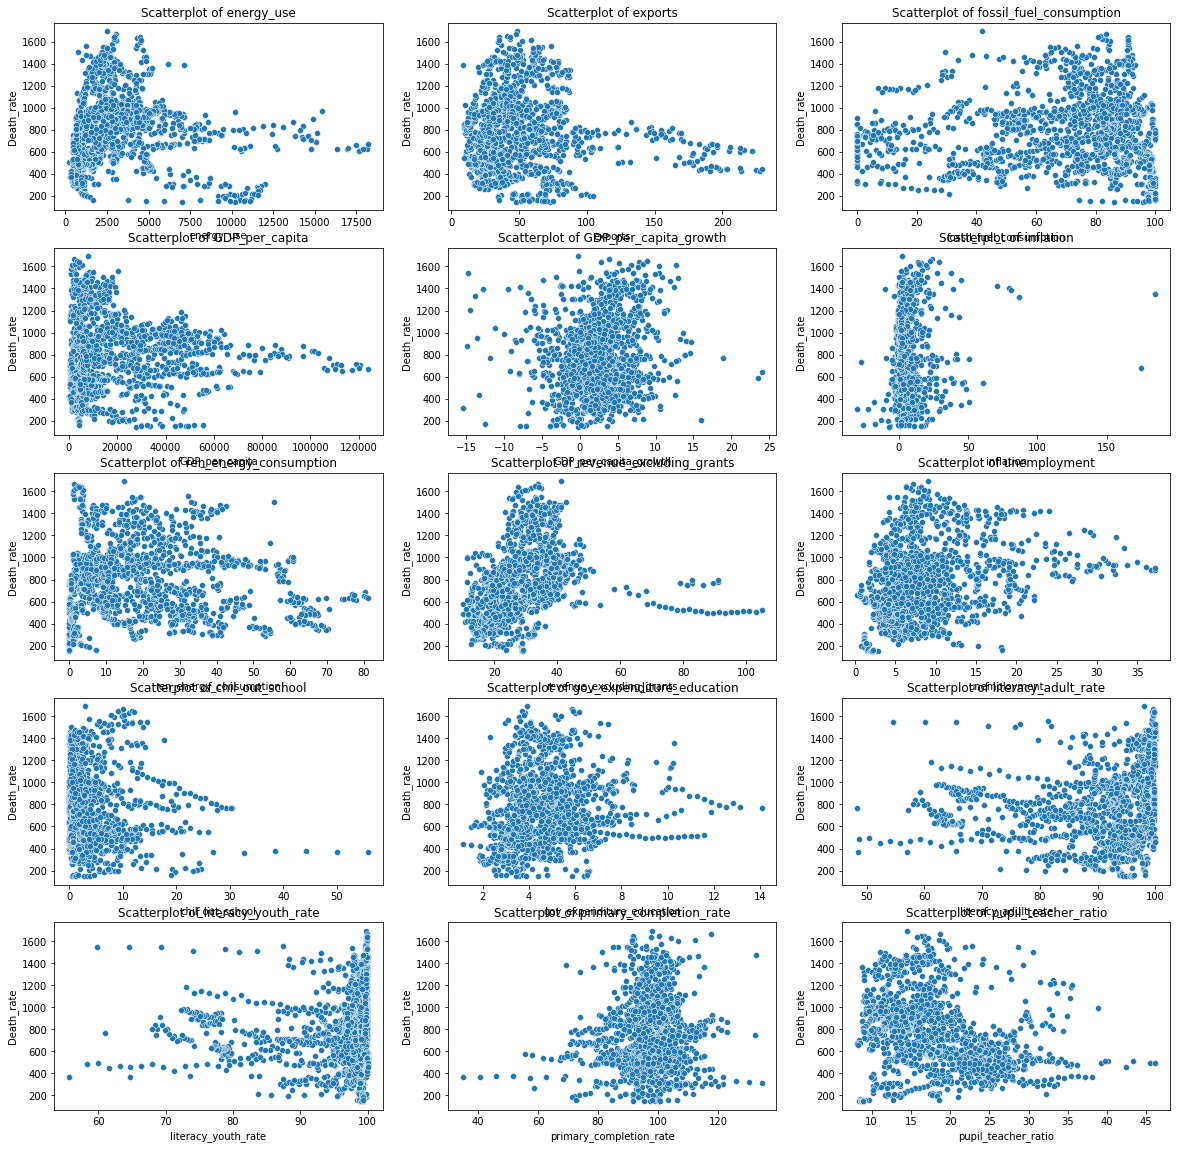

In [ ]:
variables = ['energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio']
plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(5,3,i)
    sns.scatterplot(x = tabla_completa[var],y = tabla_completa['Death_rate'])
    title_string = 'Scatterplot of ' + var
    plt.title(title_string)

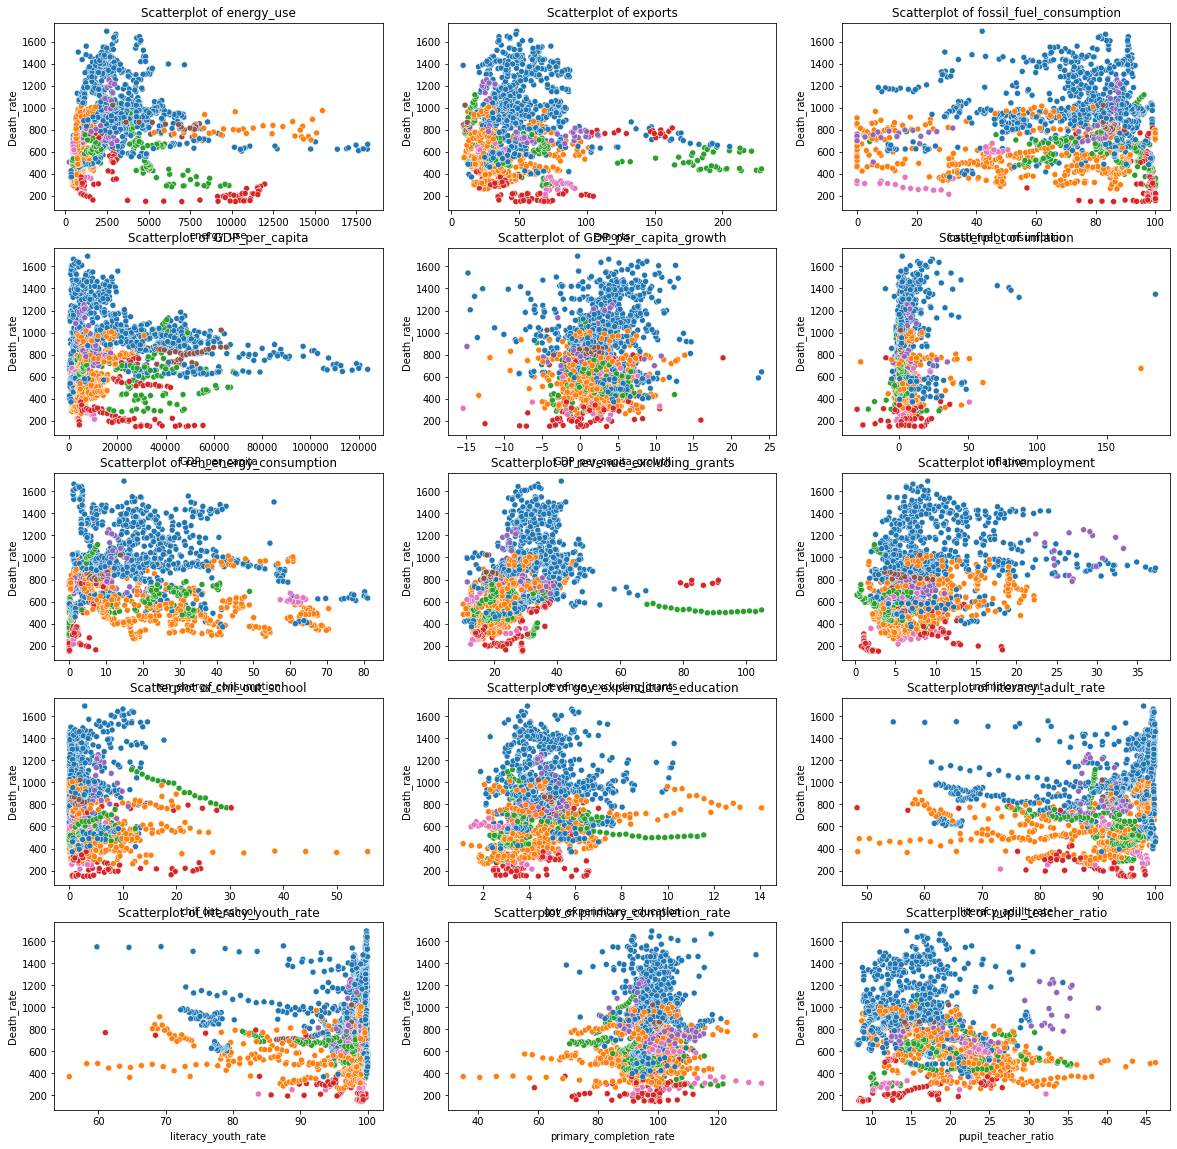

In [ ]:
variables = ['energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio']
plt.figure(figsize = (20,20))
for i, var in enumerate(variables,start =1):
    plt.subplot(5,3,i)
    sns.scatterplot(x = tabla_completa[var],y = tabla_completa['Death_rate'], hue = tabla_completa['region'], legend = False )
    title_string = 'Scatterplot of ' + var
    plt.title(title_string)

In [ ]:
tabla_completa.income.unique()

array(['Upper middle income', nan, 'High income', 'Lower middle income',
       'Low income'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

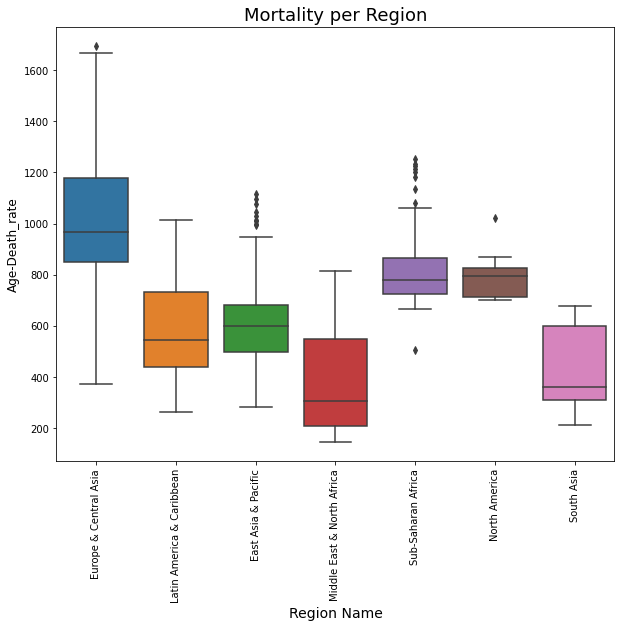

In [ ]:
# Graficamos con un diagrama de cajas o bigotes para representar los grupos de datos numéricos a través de sus cuartiles
plt.figure(figsize=(10, 8))
sns.boxplot(x="region", 
            y="Death_rate",  #Age-standardized
            data=tabla_completa)
plt.ylabel("Age-Death_rate", size=12)
plt.xlabel("Region Name", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

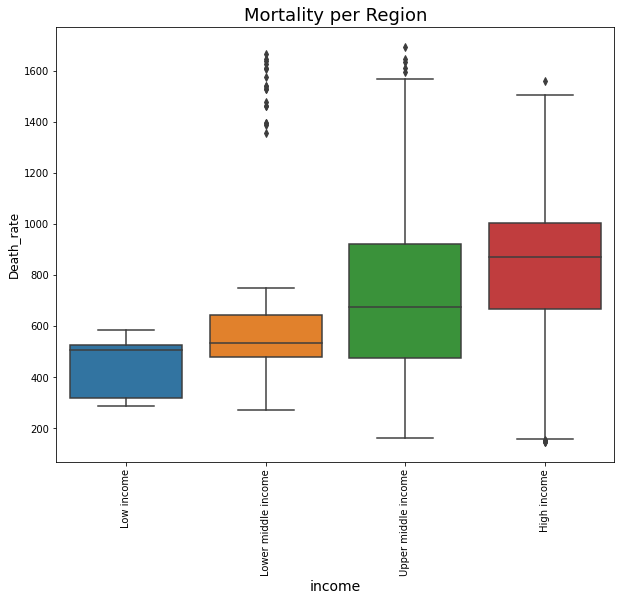

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="income", 
            y="Death_rate",  #Age-standardized
            data=tabla_completa, order = ['Low income' ,'Lower middle income', 'Upper middle income', 'High income'])
plt.ylabel("Death_rate", size=12)
plt.xlabel("income", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)

In [ ]:
tabla_completa.columns

Index(['continent', 'country', 'year', 'sex', 'Age_Group', 'Age-standardized',
       'Death_rate', 'region', 'income', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio'],
      dtype='object')

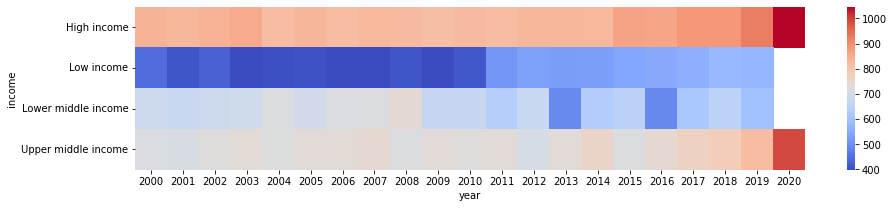

In [ ]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"]
pivoted_1 = pd.pivot_table(data=tabla_completa, index="income", columns="year", values="Death_rate")
pivoted_1.head(10)

plt.figure(figsize=(15, 3)) # We can set the size using matplotlib
sns.heatmap(pivoted_1, cmap="coolwarm")

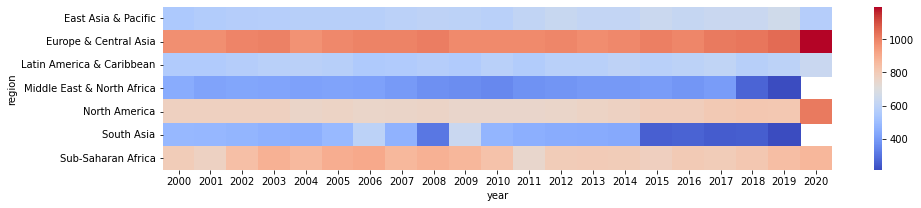

In [ ]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"]
pivoted_2 = pd.pivot_table(data=tabla_completa, index="region", columns="year", values="Death_rate")
pivoted_2.head(10)

plt.figure(figsize=(15, 3)) # We can set the size using matplotlib
sns.heatmap(pivoted_2, cmap="coolwarm")

In [ ]:
yo_cero = tabla_completa[tabla_completa.Age_Group == '[0]']
yo_cero


continent         country  year     sex  \
1                                Europe         Albania  2000     All   
22                               Europe         Albania  2000    Male   
43                               Europe         Albania  2000  Female   
64                               Europe         Albania  2001     All   
85                               Europe         Albania  2001    Male   
...                                 ...             ...   ...     ...   
125791                           Europe  United Kingdom  2019    Male   
125812                           Europe  United Kingdom  2019  Female   
125833  North America and the Caribbean   United States  2020     All   
125854  North America and the Caribbean   United States  2020    Male   
125875  North America and the Caribbean   United States  2020  Female   

       Age_Group  Age-standardized   Death_rate region income  energy_use  \
1            [0]               NaN  1030.088496    NaN    NaN         NaN   
22           [0]               NaN  1100.671141    NaN    NaN         NaN   
43           [0]               NaN   951.310861    NaN    NaN         NaN   
64           [0]               NaN  1157.656274    NaN    NaN         NaN   
85           [0]               NaN  1304.604923    NaN    NaN         NaN   
...          ...               ...          ...    ...    ...         ...   
125791       [0]               NaN   427.637953    NaN    NaN         NaN   
125812       [0]               NaN   347.561236    NaN    NaN         NaN   
125833       [0]               NaN   490.676471    NaN    NaN         NaN   
125854       [0]               NaN   532.468360    NaN    NaN         NaN   
125875       [0]               NaN   447.001406    NaN    NaN         NaN   

        ...  inflation  ren_energy_consumption  revenue_excluding_grants  \
1       ...        NaN                     NaN                       NaN   
22      ...        NaN                     NaN                       NaN   
43      ...        NaN                     NaN                       NaN   
64      ...        NaN                     NaN                       NaN   
85      ...        NaN                     NaN                       NaN   
...     ...        ...                     ...                       ...   
125791  ...        NaN                     NaN                       NaN   
125812  ...        NaN                     NaN                       NaN   
125833  ...        NaN                     NaN                       NaN   
125854  ...        NaN                     NaN                       NaN   
125875  ...        NaN                     NaN                       NaN   

        unemployment  chil_out_school  gov_expenditure_education  \
1                NaN              NaN                        NaN   
22               NaN              NaN                        NaN   
43               NaN              NaN                        NaN   
64               NaN              NaN                        NaN   
85               NaN              NaN                        NaN   
...              ...              ...                        ...   
125791           NaN              NaN                        NaN   
125812           NaN              NaN                        NaN   
125833           NaN              NaN                        NaN   
125854           NaN              NaN                        NaN   
125875           NaN              NaN                        NaN   

        literacy_adult_rate  literacy_youth_rate  primary_completion_rate  \
1                       NaN                  NaN                      NaN   
22                      NaN                  NaN                      NaN   
43                      NaN                  NaN                      NaN   
64                      NaN                  NaN                      NaN   
85                      NaN                  NaN                      NaN   
...                     ...         

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

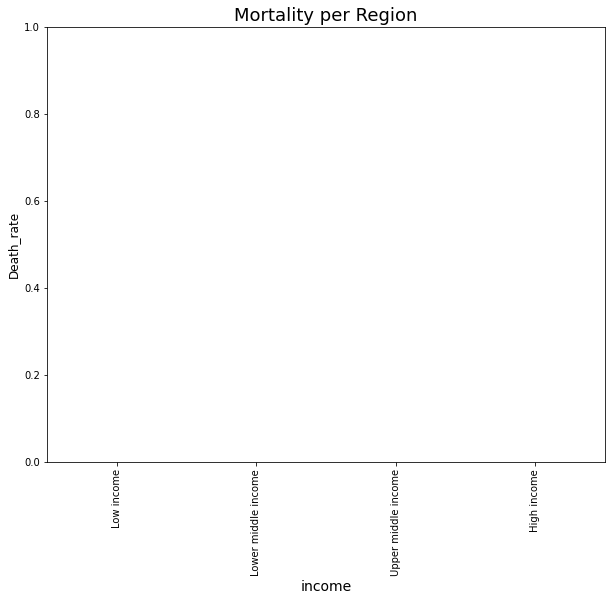

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="income", 
            y="Death_rate",  #Age-standardized
            data=yo_cero, order = ['Low income' ,'Lower middle income', 'Upper middle income', 'High income'])
plt.ylabel("Death_rate", size=12)
plt.xlabel("income", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)


In [ ]:
MergeTable.rename(columns={'Age-standardized_death_rate_per_100000_standard_population':'Age_standardized_death_rate_per_100000_standard_population'})
MergeTable.head()

year  chil_out_school  gov_expenditure_education  literacy_adult_rate  \
0 2000-12-31          4.61665                    3.43017            97.377179   
1 2000-12-31          4.61665                    3.43017            97.377179   
2 2000-12-31          4.61665                    3.43017            97.377179   
3 2000-12-31          4.61665                    3.43017            97.377179   
4 2000-12-31          4.61665                    3.43017            97.377179   

   literacy_youth_rate  primary_completion_rate  pupil_teacher_ratio  \
0            98.489373                96.582687             22.56784   
1            98.489373                96.582687             22.56784   
2            98.489373                96.582687             22.56784   
3            98.489373                96.582687             22.56784   
4            98.489373                96.582687             22.56784   

   energy_use    exports  fossil_fuel_consumption  ...  \
0  580.494764  20.115286                58.715098  ...   
1  580.494764  20.115286                58.715098  ...   
2  580.494764  20.115286                58.715098  ...   
3  580.494764  20.115286                58.715098  ...   
4  580.494764  20.115286                58.715098  ...   

   revenue_excluding_grants  unemployment  Region_Name  Country_Name  Year  \
0                 23.950911        19.028       Europe       Albania  2000   
1                 23.950911        19.028       Europe       Albania  2000   
2                 23.950911        19.028       Europe       Albania  2000   
3                 23.950911        19.028       Europe       Albania  2000   
4                 23.950911        19.028       Europe       Albania  2000   

   Sex Age_Group Number_of_deaths  \
0  All     [All]          16411.0   
1  All       [0]            582.0   
2  All     [1-4]            343.0   
3  All     [5-9]            169.0   
4  All   [10-14]            118.0   

   Age-standardized_death_rate_per_100000_standard_population  \
0                                         697.153727            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  Death_rate_per_100000population  
0                      527.007065  
1                     1030.088496  
2                      131.367292  
3                       46.441330  
4                       35.150432  

[5 rows x 24 columns]

In [ ]:
MergeTable2 = MergeTable.copy()

In [ ]:
MergeTable2 = MergeTable2.rename(columns={'Age-standardized_death_rate_per_100000_standard_population':'Age_standardized_death_rate_per_100000_standard_population'})
MergeTable2.columns

Index(['year', 'chil_out_school', 'gov_expenditure_education',
       'literacy_adult_rate', 'literacy_youth_rate', 'primary_completion_rate',
       'pupil_teacher_ratio', 'energy_use', 'exports',
       'fossil_fuel_consumption', 'GDP_per_capita', 'GDP_per_capita_growth',
       'inflation', 'ren_energy_consumption', 'revenue_excluding_grants',
       'unemployment', 'Region_Name', 'Country_Name', 'Year', 'Sex',
       'Age_Group', 'Number_of_deaths',
       'Age_standardized_death_rate_per_100000_standard_population',
       'Death_rate_per_100000population'],
      dtype='object')


**Correlación de 2 variables**

In [ ]:
import statsmodels.formula.api as sm 


In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ ren_energy_consumption'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.000
Model:                                                                    OLS   Adj. R-squared:                  0.000
Method:                                                         Least Squares   F-statistic:                     15.93
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):           6.57e-05
Time:                                                                01:44:25   Log-Likelihood:            -7.9648e+05
No. Observations:                                                      114642   AIC:                         1.593e+06
Df Residuals:                                                          114640   BIC:                         1.593e+06
Df Model:                                       

**`ren_energy_consumption`** no aporta nada al modelo de regresion lineal. R^2 = 0

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.188
Model:                                                                    OLS   Adj. R-squared:                  0.188
Method:                                                         Least Squares   F-statistic:                 2.647e+04
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:26   Log-Likelihood:            -7.8458e+05
No. Observations:                                                      114642   AIC:                         1.569e+06
Df Residuals:                                                          114640   BIC:                         1.569e+06
Df Model:                                       

**`GDP_per_capita`** es la variable independiente con mayor correlacion, aporta al modelo con un **R-squared[0.188]**

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ revenue_excluding_grants'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.022
Model:                                                                    OLS   Adj. R-squared:                  0.022
Method:                                                         Least Squares   F-statistic:                     2606.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:26   Log-Likelihood:            -7.9520e+05
No. Observations:                                                      114642   AIC:                         1.590e+06
Df Residuals:                                                          114640   BIC:                         1.590e+06
Df Model:                                       

**`revenue_excluding_grants`** es la variable independiente con mayor correlacion, aporta al modelo con un **R-squared[0.022]**




In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ exports'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.015
Model:                                                                    OLS   Adj. R-squared:                  0.015
Method:                                                         Least Squares   F-statistic:                     1696.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:26   Log-Likelihood:            -7.9564e+05
No. Observations:                                                      114642   AIC:                         1.591e+06
Df Residuals:                                                          114640   BIC:                         1.591e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ chil_out_school'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.002
Model:                                                                    OLS   Adj. R-squared:                  0.002
Method:                                                         Least Squares   F-statistic:                     271.9
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):           5.11e-61
Time:                                                                01:44:26   Log-Likelihood:            -7.9635e+05
No. Observations:                                                      114642   AIC:                         1.593e+06
Df Residuals:                                                          114640   BIC:                         1.593e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ inflation'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.044
Model:                                                                    OLS   Adj. R-squared:                  0.044
Method:                                                         Least Squares   F-statistic:                     5299.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:27   Log-Likelihood:            -7.9389e+05
No. Observations:                                                      114642   AIC:                         1.588e+06
Df Residuals:                                                          114640   BIC:                         1.588e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita_growth'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.014
Model:                                                                    OLS   Adj. R-squared:                  0.014
Method:                                                         Least Squares   F-statistic:                     1657.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:27   Log-Likelihood:            -7.9566e+05
No. Observations:                                                      114642   AIC:                         1.591e+06
Df Residuals:                                                          114640   BIC:                         1.591e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ fossil_fuel_consumption'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.012
Model:                                                                    OLS   Adj. R-squared:                  0.012
Method:                                                         Least Squares   F-statistic:                     1361.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):          3.60e-296
Time:                                                                01:44:27   Log-Likelihood:            -7.9581e+05
No. Observations:                                                      114642   AIC:                         1.592e+06
Df Residuals:                                                          114640   BIC:                         1.592e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ unemployment'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.060
Model:                                                                    OLS   Adj. R-squared:                  0.060
Method:                                                         Least Squares   F-statistic:                     7261.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:27   Log-Likelihood:            -7.9296e+05
No. Observations:                                                      114642   AIC:                         1.586e+06
Df Residuals:                                                          114640   BIC:                         1.586e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ energy_use'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.030
Model:                                                                    OLS   Adj. R-squared:                  0.030
Method:                                                         Least Squares   F-statistic:                     3540.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:27   Log-Likelihood:            -7.9474e+05
No. Observations:                                                      114642   AIC:                         1.589e+06
Df Residuals:                                                          114640   BIC:                         1.590e+06
Df Model:                                       

**Correlación de 3 o mas variables**

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita + inflation'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.200
Model:                                                                    OLS   Adj. R-squared:                  0.200
Method:                                                         Least Squares   F-statistic:                 1.431e+04
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:28   Log-Likelihood:            -7.8371e+05
No. Observations:                                                      114642   AIC:                         1.567e+06
Df Residuals:                                                          114639   BIC:                         1.567e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita + inflation + unemployment'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.218
Model:                                                                    OLS   Adj. R-squared:                  0.218
Method:                                                         Least Squares   F-statistic:                 1.068e+04
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:28   Log-Likelihood:            -7.8235e+05
No. Observations:                                                      114642   AIC:                         1.565e+06
Df Residuals:                                                          114638   BIC:                         1.565e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita + inflation + unemployment + pupil_teacher_ratio'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.223
Model:                                                                    OLS   Adj. R-squared:                  0.223
Method:                                                         Least Squares   F-statistic:                     8238.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:28   Log-Likelihood:            -7.8200e+05
No. Observations:                                                      114642   AIC:                         1.564e+06
Df Residuals:                                                          114637   BIC:                         1.564e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita + inflation + unemployment + chil_out_school'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.220
Model:                                                                    OLS   Adj. R-squared:                  0.220
Method:                                                         Least Squares   F-statistic:                     8062.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:29   Log-Likelihood:            -7.8228e+05
No. Observations:                                                      114642   AIC:                         1.565e+06
Df Residuals:                                                          114637   BIC:                         1.565e+06
Df Model:                                       

In [ ]:
formula1 = 'Age_standardized_death_rate_per_100000_standard_population ~ GDP_per_capita + inflation + energy_use + unemployment'
model1 = sm.ols(formula = formula1, data = MergeTable2)
fitted1 = model1.fit()
print(fitted1.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.223
Model:                                                                    OLS   Adj. R-squared:                  0.223
Method:                                                         Least Squares   F-statistic:                     8239.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:29   Log-Likelihood:            -7.8200e+05
No. Observations:                                                      114642   AIC:                         1.564e+06
Df Residuals:                                                          114637   BIC:                         1.564e+06
Df Model:                                       

In [ ]:
import statsmodels.formula.api as sm 

In [ ]:
formula2 = '''Age_standardized_death_rate_per_100000_standard_population ~ Year+ chil_out_school+gov_expenditure_education+ 
      literacy_adult_rate+ literacy_youth_rate+primary_completion_rate+energy_use+exports+fossil_fuel_consumption+GDP_per_capita + 
      inflation +ren_energy_consumption+ unemployment +revenue_excluding_grants + Q('Sex') +Number_of_deaths + 
      pupil_teacher_ratio'''
model2 = sm.ols(formula = formula2, data = MergeTable2)
fitted2 = model2.fit()
print(fitted2.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.527
Model:                                                                    OLS   Adj. R-squared:                  0.527
Method:                                                         Least Squares   F-statistic:                     7092.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:38   Log-Likelihood:            -7.5358e+05
No. Observations:                                                      114642   AIC:                         1.507e+06
Df Residuals:                                                          114623   BIC:                         1.507e+06
Df Model:                                       

In [ ]:
formula2 = '''Age_standardized_death_rate_per_100000_standard_population ~ +energy_use+exports+fossil_fuel_consumption+GDP_per_capita + 
      inflation +ren_energy_consumption+ unemployment +revenue_excluding_grants + Q('Sex') + pupil_teacher_ratio'''
model2 = sm.ols(formula = formula2, data = MergeTable2)
fitted2 = model2.fit()
print(fitted2.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Age_standardized_death_rate_per_100000_standard_population   R-squared:                       0.445
Model:                                                                    OLS   Adj. R-squared:                  0.445
Method:                                                         Least Squares   F-statistic:                     8366.
Date:                                                        Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                                                                01:44:47   Log-Likelihood:            -7.6270e+05
No. Observations:                                                      114642   AIC:                         1.525e+06
Df Residuals:                                                          114630   BIC:                         1.526e+06
Df Model:                                       

In [ ]:
MergeTable2.head()

year  chil_out_school  gov_expenditure_education  literacy_adult_rate  \
0 2000-12-31          4.61665                    3.43017            97.377179   
1 2000-12-31          4.61665                    3.43017            97.377179   
2 2000-12-31          4.61665                    3.43017            97.377179   
3 2000-12-31          4.61665                    3.43017            97.377179   
4 2000-12-31          4.61665                    3.43017            97.377179   

   literacy_youth_rate  primary_completion_rate  pupil_teacher_ratio  \
0            98.489373                96.582687             22.56784   
1            98.489373                96.582687             22.56784   
2            98.489373                96.582687             22.56784   
3            98.489373                96.582687             22.56784   
4            98.489373                96.582687             22.56784   

   energy_use    exports  fossil_fuel_consumption  ...  \
0  580.494764  20.115286                58.715098  ...   
1  580.494764  20.115286                58.715098  ...   
2  580.494764  20.115286                58.715098  ...   
3  580.494764  20.115286                58.715098  ...   
4  580.494764  20.115286                58.715098  ...   

   revenue_excluding_grants  unemployment  Region_Name  Country_Name  Year  \
0                 23.950911        19.028       Europe       Albania  2000   
1                 23.950911        19.028       Europe       Albania  2000   
2                 23.950911        19.028       Europe       Albania  2000   
3                 23.950911        19.028       Europe       Albania  2000   
4                 23.950911        19.028       Europe       Albania  2000   

   Sex Age_Group Number_of_deaths  \
0  All     [All]          16411.0   
1  All       [0]            582.0   
2  All     [1-4]            343.0   
3  All     [5-9]            169.0   
4  All   [10-14]            118.0   

   Age_standardized_death_rate_per_100000_standard_population  \
0                                         697.153727            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  Death_rate_per_100000population  
0                      527.007065  
1                     1030.088496  
2                      131.367292  
3                       46.441330  
4                       35.150432  

[5 rows x 24 columns]

**R2=0.527**  Esto quiere decir que el modelo (o las variables explicativas) explica el 52.7% de la variabilidad de la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes.

**Prob(F−statistic)=0.00** P-valor cercano a cero 

**AIC,BIC=1.507e6.** A comparación del anterior modelo que obtuvo un AIC y BIC de1.564e^6, este presenta menores resultados en estos criterios. Por lo anterior, se afirma que presenta un mejor ajuste de los datos.

##**Se puede observar**

Que las variables que presentan mayor aporte a la explicación de la variable objetivo, tasa de mortalidad estandarizada por edad por cada 100.000 habitantes, de acuerdo a su valor de coeficiente de regresión, corresponde a sexo con coeficientes mayores a 100 y al año con un coeficiente de -10.8.

+ **year=−10.84** . Por cada año adicional que transcurra se esperaría que en promedio la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes disminuya en aproximadaamente 10.84 puntos.

+ **literacyyouthrate=−1.91** . Por cada unidad adicional en la tasa de analfabetismo en los jovenes, se esperaría que la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes disminuya en 1.91 puntos.

+ **govexpenditureeducation7.36** . Por cada unidad monetaria adicional en el gasto de educación publica, en promedio la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes aumenta 7.36 puntos.

+ **unemployment=7.65** . Por cada punto adicional en el desempleo, se espera que en promedio la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes aumente 7.65 puntos.

+ **inflation=2.99** . Por cada punto adicional en la inflación se espera que en promedio la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes aumente 3 puntos aproximadamente.

+ **sex**. Positivo para hombre, negativo para mujer. Es decir la tasa de mortalidad estandarizada por edad por cada 100.000 habitantes disminuye 111.53 si la persona es mujer y aumenta 164.3 si es hombre.